DATA WRANGLING
STEP-1 DATA CLEANING


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [ ]:
df_offer = pd.read_csv('/content/drive/MyDrive/Starbucks_Customer_Segmentation/portfolio.csv')
df_offer.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [ ]:
df_customer = pd.read_csv('/content/drive/MyDrive/Starbucks_Customer_Segmentation/profile.csv')
df_customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [ ]:
df_transcript = pd.read_csv('/content/drive/MyDrive/Starbucks_Customer_Segmentation/transcript.csv')
df_transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [ ]:
df_offer = df_offer.drop('Unnamed: 0', axis = 1)
df_customer = df_customer.drop('Unnamed: 0', axis = 1)
df_transcript = df_transcript.drop('Unnamed: 0', axis = 1)

In [ ]:
df_offer.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [ ]:
df_customer.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [ ]:
df_transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [ ]:
missing_gender = df_customer[df_customer['gender'].isna()]
missing_income = df_customer[df_customer['income'].isna()]

np.sum(missing_gender['id'] == missing_income['id'])

2175

In [ ]:
id_to_remove = missing_income['id']
df_customer_no_na = df_customer[~df_customer['id'].isin(id_to_remove)]
df_customer_no_na = df_customer_no_na.reset_index(drop = True)
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


In [ ]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [ ]:
channels_0 = df_offer['channels'][0]
offer_type_0 = df_offer['offer_type'][0]
id_0 = df_offer['id'][0]

print('First value in column channels:', channels_0, '  --   Data type:', type(channels_0))
print('First value in column offer_type:', offer_type_0, '  --   Data type:', type(offer_type_0))
print('First value in column id:', id_0, '  --   Data type:', type(id_0))

First value in column channels: ['email', 'mobile', 'social']   --   Data type: <class 'str'>
First value in column offer_type: bogo   --   Data type: <class 'str'>
First value in column id: ae264e3637204a6fb9bb56bc8210ddfd   --   Data type: <class 'str'>


In [ ]:
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


In [ ]:
df_customer_no_na['became_member_on'] = pd.to_datetime(df_customer_no_na['became_member_on'], format = '%Y%m%d')

In [ ]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
# Rename column `time`
df_transcript.rename(columns = {'time' : 'hours_since_start'}, inplace = True)
df_transcript.head(1)

,person,event,value,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0


In [ ]:
# Check data type of column `value`
type(df_transcript['value'][0])

str

STEP-2 DATA TRANSFORMATION


In [ ]:
# Sort df offers
df_offer = df_offer.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Add column `offer_alias`
from string import ascii_uppercase
df_offer['offer_alias'] = [ascii_uppercase[i] for i in range(df_offer.shape[0])]
df_offer

,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J


In [ ]:
# Elements in value_columns are strings. Convert them to dictionaries
value_column = df_transcript['value']
value_column = value_column.apply(eval)
value_column[:3]

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
Name: value, dtype: object

In [ ]:
# Extract the keys
dictionary_key_column = [list(d.keys())[0] for d in value_column]
# Extract the values
dictionary_value_column = [list(d.values())[0] for d in value_column]
# Create a df containing the keys and values of the dictionary elements of `value_column`
value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column
value_column_split.head(3)


,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5


In [ ]:
# Replace `value` column with df `value_column_split`
df_transcript_value_mod = df_transcript.drop('value', axis = 1)
df_transcript_value_mod = pd.concat([df_transcript_value_mod, value_column_split], axis = 1)


In [ ]:
# Reorder columns
df_transcript_value_mod.columns.values

array(['person', 'event', 'hours_since_start', 'dict_key', 'dict_value'],
      dtype=object)

In [ ]:
col_names = ['person', 'event', 'dict_key', 'dict_value', 'hours_since_start']
df_transcript_value_mod = df_transcript_value_mod[col_names]
df_transcript_value_mod.sample(3)

,person,event,dict_key,dict_value,hours_since_start
134945,529e725338614c8fb3f02d160651c2d9,offer viewed,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,354
290501,5bd7a2745d0641d89d174521080558eb,transaction,amount,5.14,648
94302,78bb7e19ab9b42b09d3744089d2b6a32,transaction,amount,1.19,246


In [ ]:
offers = df_offer.copy()
customers = df_customer_no_na.copy()
transcripts = df_transcript_value_mod.copy()

EXPLORATORY DATA ANALYSIS


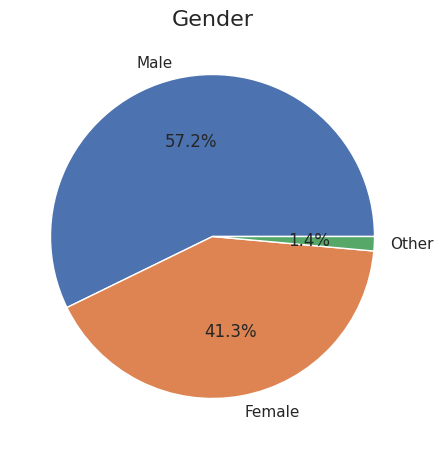

In [ ]:
wedge_size =  df_customer_no_na['gender'].value_counts()
wedge_label = ['Male', 'Female', 'Other']
plt.figure(figsize = (5,5))
plt.pie(x = wedge_size, labels = wedge_label, autopct = '%1.1f%%')
plt.title('Gender', fontsize = 16)
plt.show()

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


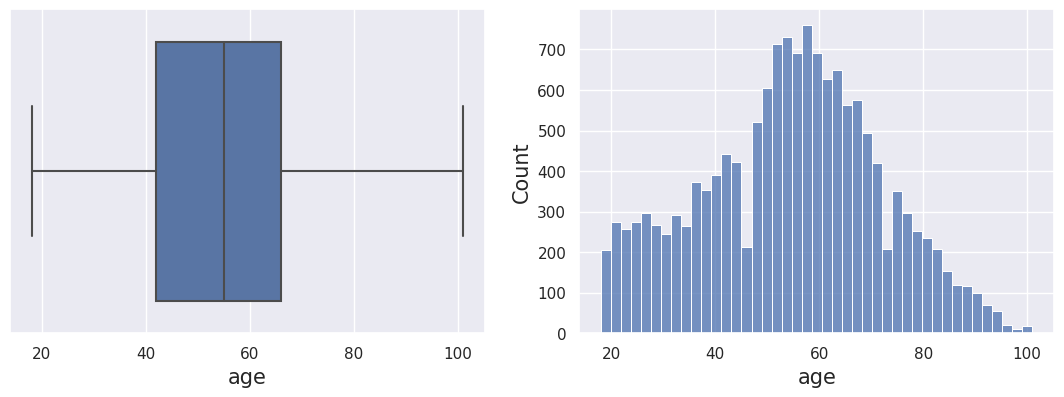

In [ ]:
#UNIVARIATE ANALYSIS ON THE BASIS OF AGE
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'age', ax = axs[0])
sns.histplot(data = customers, x = 'age', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['age'].describe())

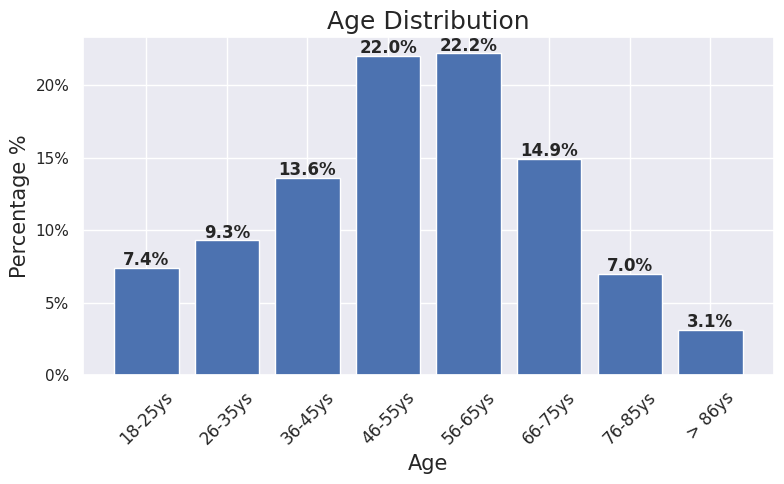

In [ ]:
# Create a new column `age_group`
age_group = pd.cut(customers['age'],
      bins = [customers['age'].min(), 26, 36, 46, 56, 66, 76, 86, customers['age'].max()],
      labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys'])
customers['age_group'] = age_group

# Visualize customers by age groups
age_group_percentage = (customers.value_counts('age_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,25,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Age Distribution', fontsize = 18)

bar_plot = plt.bar(x = age_group_percentage.index.values, height = age_group_percentage)
for i,bar in enumerate(bar_plot.patches):
   x, y = bar.get_xy()
   plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(age_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

UNIVARIATE ANALYSIS ON THE BASIS OF INCOME


count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


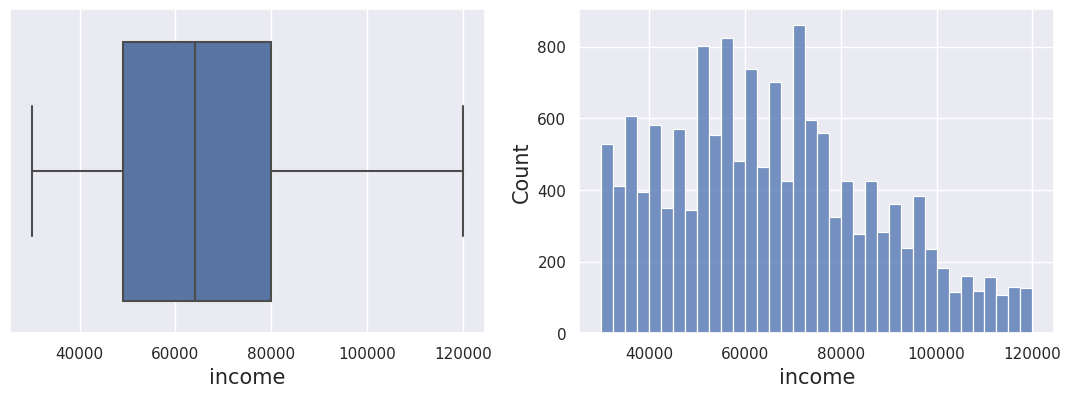

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'income', ax = axs[0])
sns.histplot(data = customers, x = 'income', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['income'].describe())

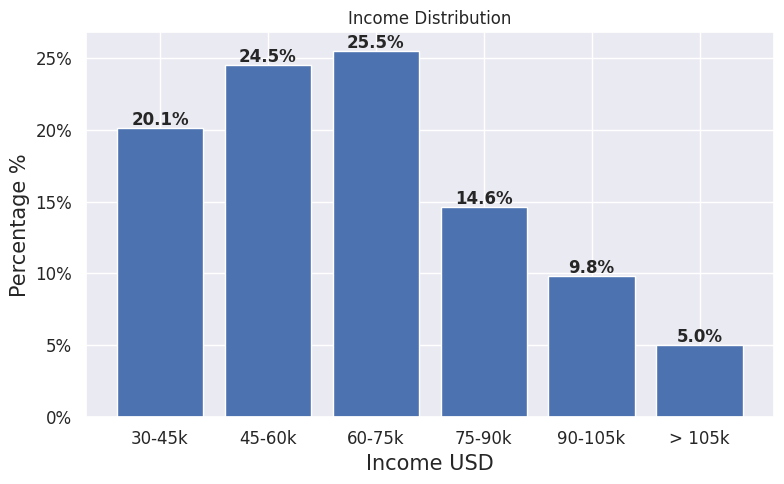

In [ ]:
# Create a new column `income_group`
income_group = pd.cut(customers['income'],
      bins = [customers['income'].min(), 45000, 60000, 75000, 90000, 105000, customers['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
customers['income_group'] = income_group

# Visualize customers by income groups
income_group_percentage = (customers.value_counts('income_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,30,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('Income USD', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Income Distribution')

bar_plot = plt.bar(x = income_group_percentage.index.values, height = income_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(income_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold', fontsize = 12)
plt.tight_layout()
plt.show()

UNIVARIAYE ANALYSIS ON BECAME MEMBER ON


In [ ]:
# Create a new df focusing on the time customers became members
df_member = customers[['id', 'became_member_on']]

# Add columns `year`, `month`, `day_of_week`
df_member = df_member.assign(year = df_member.became_member_on.dt.year,
                             month = df_member.became_member_on.dt.month,
                             day = df_member.became_member_on.dt.day,
                             month_name = df_member.became_member_on.dt.month_name(),
                             day_of_week = df_member.became_member_on.dt.weekday,
                             day_name = df_member.became_member_on.dt.day_name())
df_member.head(3)

,id,became_member_on,year,month,day,month_name,day_of_week,day_name
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,2017,7,15,July,5,Saturday
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,2017,5,9,May,1,Tuesday
2,e2127556f4f64592b11af22de27a7932,2018-04-26,2018,4,26,April,3,Thursday


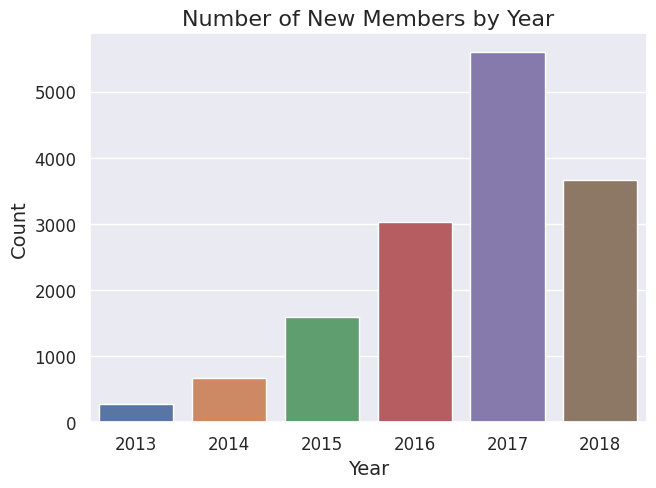

In [ ]:
sns.countplot(data = df_member, x = 'year')
plt.title('Number of New Members by Year', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Year', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

In [ ]:
# Create a time series with the number of new member on each day
p = df_member.value_counts('became_member_on').sort_index()
df_member_growth = pd.DataFrame(index = p.index.values, data = p.values, columns = ['Number of New Members'])

In [ ]:
# There are four phases with clearly different daily growth
phase_1 = df_member_growth.loc['2013-july': '2015-july']
len_phase_1 = phase_1.shape[0]
mean_phase_1 = phase_1.mean().values

phase_2 = df_member_growth.loc['2015-august': '2017-july']
len_phase_2 = phase_2.shape[0]
mean_phase_2 = phase_2.mean().values

phase_3 = df_member_growth.loc['2017-august': '2018-jan']
len_phase_3 = phase_3.shape[0]
mean_phase_3 = phase_3.mean().values

phase_4 = df_member_growth.loc['2018-feb': '2018-july']
len_phase_4 = phase_4.shape[0]
mean_phase_4 = phase_4.mean().values

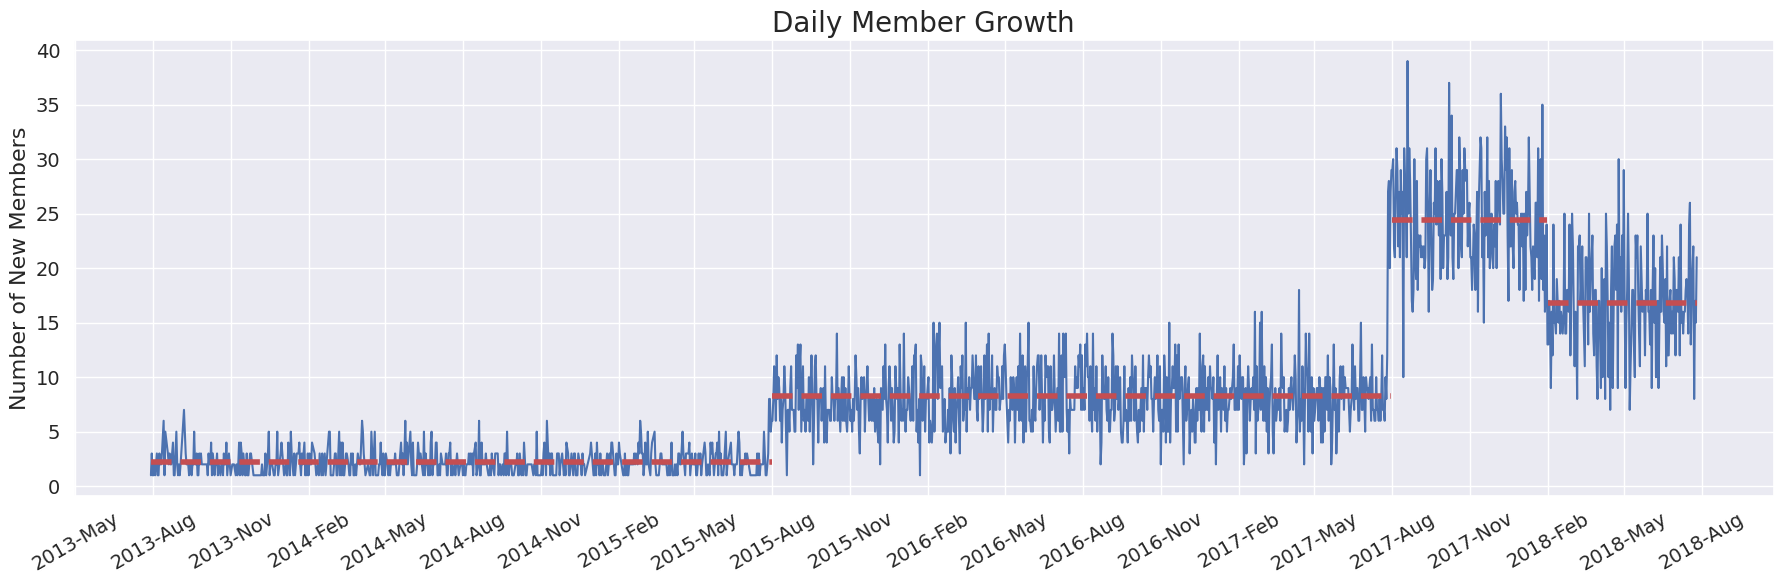

In [ ]:
# Visualize
plt.figure(figsize = (18,6))
ax = sns.lineplot(x = df_member_growth.index.values, y = df_member_growth['Number of New Members'])
date_format = mdates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))

plt.plot(phase_1.index.values, np.ones(len_phase_1)*mean_phase_1, '--r', lw = 4)
plt.plot(phase_2.index.values, np.ones(len_phase_2)*mean_phase_2, '--r', lw = 4)
plt.plot(phase_3.index.values, np.ones(len_phase_3)*mean_phase_3, '--r', lw = 4)
plt.plot(phase_4.index.values, np.ones(len_phase_4)*mean_phase_4, '--r', lw = 4)

plt.xticks(text = ax.xaxis.get_label(), fontsize = 14, rotation = 30)
plt.yticks(text = ax.yaxis.get_label(), fontsize = 14)
plt.ylabel('Number of New Members', fontsize = 16)
plt.title('Daily Member Growth', fontsize = 20)
plt.tight_layout()
plt.show()

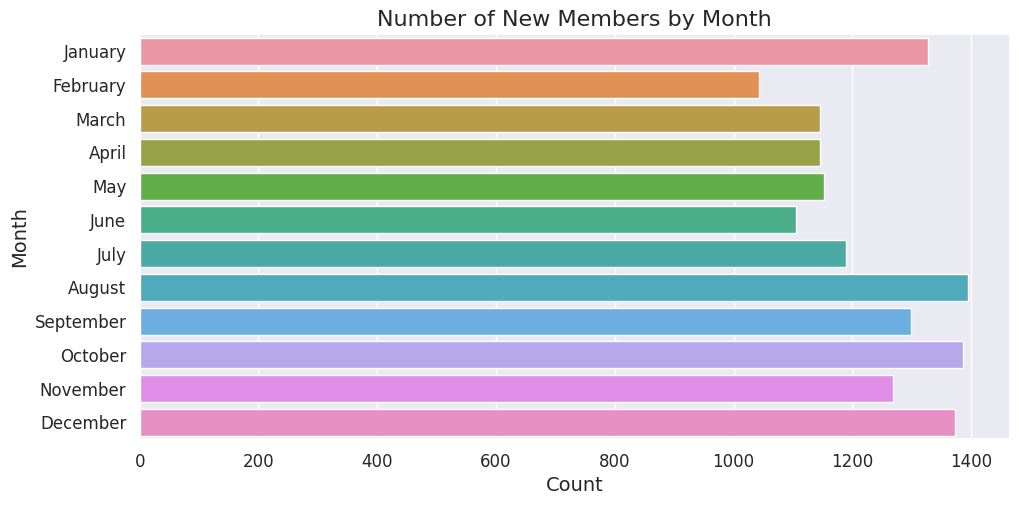

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_member.sort_values('month'), y = 'month_name')
plt.title('Number of New Members by Month', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Month', fontsize = 14)
plt.show()

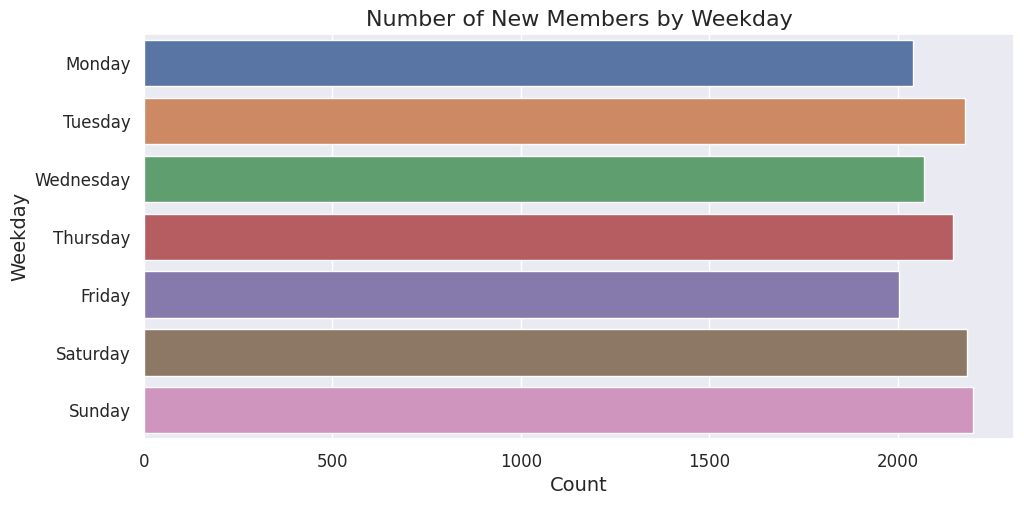

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_member.sort_values('day_of_week'), y = 'day_name')
plt.title('Number of New Members by Weekday', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Weekday', fontsize = 14)
plt.show()

              age
gender           
F       57.544950
M       52.116690
O       54.400943


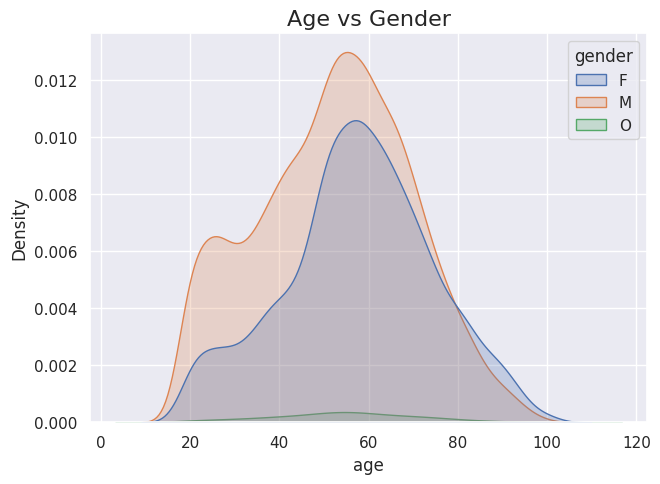

In [ ]:
print(customers.groupby('gender').agg({'age': 'mean'}))
sns.kdeplot(data = customers, x = 'age', hue = 'gender', fill = True)
plt.title('Age vs Gender', fontsize = 16)
plt.show()

              income
gender              
F       71306.412139
M       61194.601603
O       63287.735849


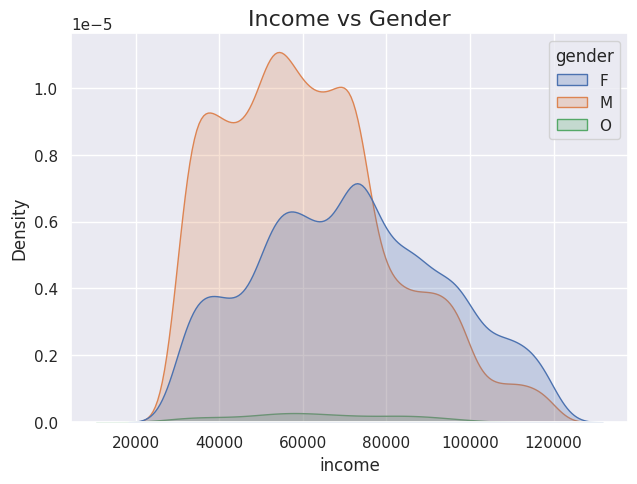

In [ ]:
print(customers.groupby('gender').agg({'income': 'mean'}))
sns.kdeplot(data = customers, x = 'income', hue = 'gender', fill = True)
plt.title('Income vs Gender', fontsize = 16)
plt.show()

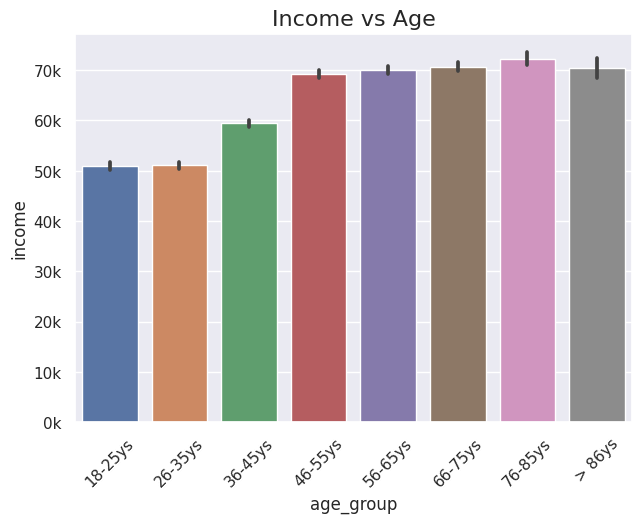

In [ ]:
sns.barplot(data = customers, x = 'age_group', y = 'income')
plt.xticks(rotation = 45)
ytick_labels = [str(i) + 'k' for i in (np.arange(0, 80000, 10000) / 1000).astype(int)]
plt.yticks(np.arange(0, 80000, 10000), labels = ytick_labels)
plt.title('Income vs Age', fontsize = 16)
plt.show()

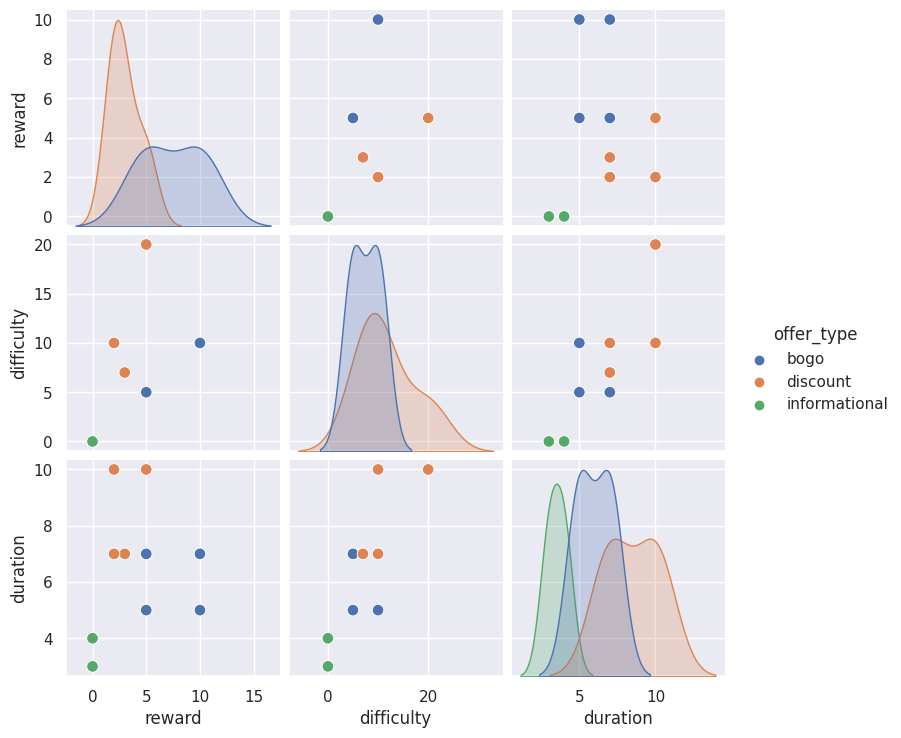

In [ ]:
sns.pairplot(offers, hue = 'offer_type',
             plot_kws = dict(marker="o", s=70),); plt.show()

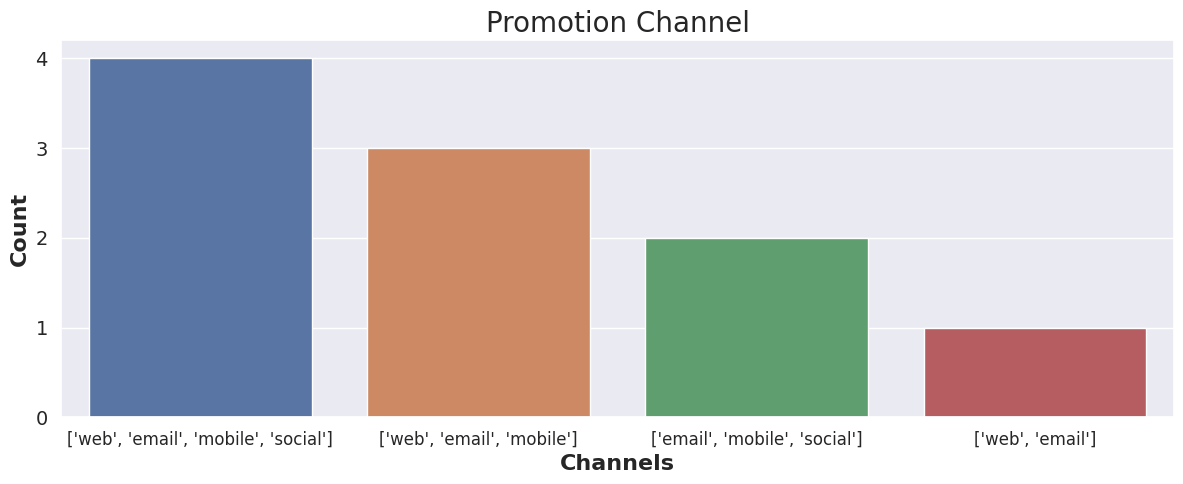

In [ ]:
p = offers.value_counts('channels')
plt.figure(figsize = (12,5))
sns.barplot(x = p.index.values, y = p.values)
plt.xticks(rotation = None, fontsize = 12)
plt.yticks(np.arange(5), fontsize = 14)
plt.xlabel('Channels', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count', fontsize = 16, fontweight = 'bold')
plt.title('Promotion Channel', fontsize = 20)
plt.tight_layout()
plt.show()

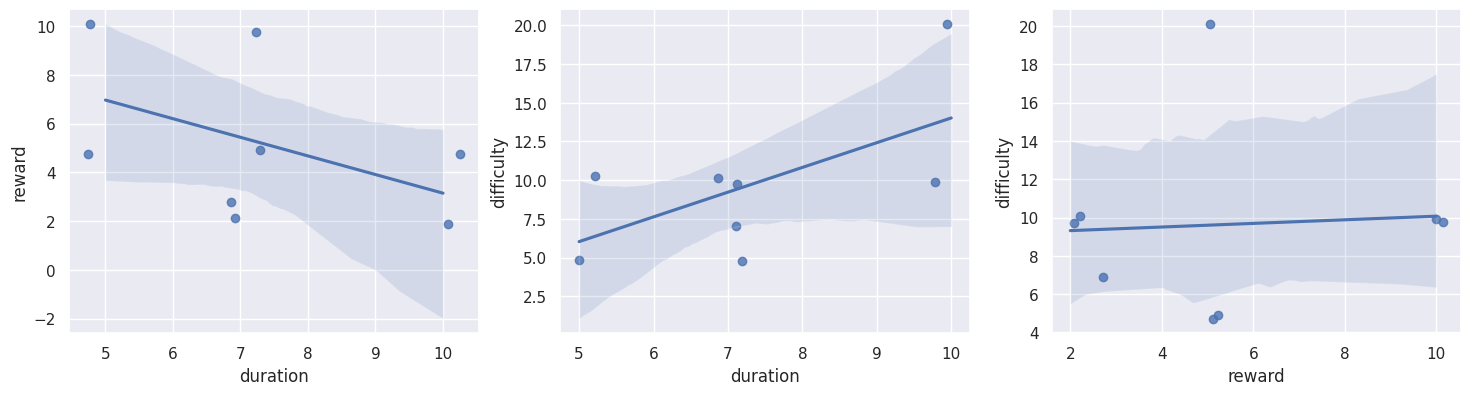

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (16,4))
sns.regplot(data = offers[0:8], x = 'duration', y ='reward', x_jitter = 0.3, y_jitter = 0.3, ax = axs[0])
sns.regplot(data = offers[0:8], x = 'duration', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[1])
sns.regplot(data = offers[0:8], x = 'reward', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[2])
plt.show()

EDA ON transcript data


In [ ]:
transcripts['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

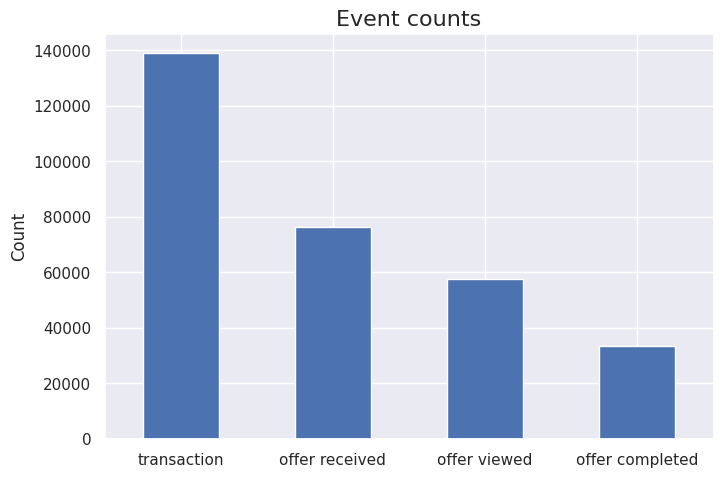

In [ ]:
fig = plt.figure(figsize = (7,5))
transcripts['event'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = None)
plt.ylabel('Count')
plt.title('Event counts', fontsize = 16)
plt.show()

In [ ]:
# Add column `days_since_start`
transcripts = transcripts.assign(days_since_start = transcripts['hours_since_start']/24).astype({'days_since_start': 'int64'})
print('The minimum and the maximum of column days_since_start: {} and {}'.format(transcripts['days_since_start'].min(), transcripts['days_since_start'].max()))

The minimum and the maximum of column days_since_start: 0 and 29


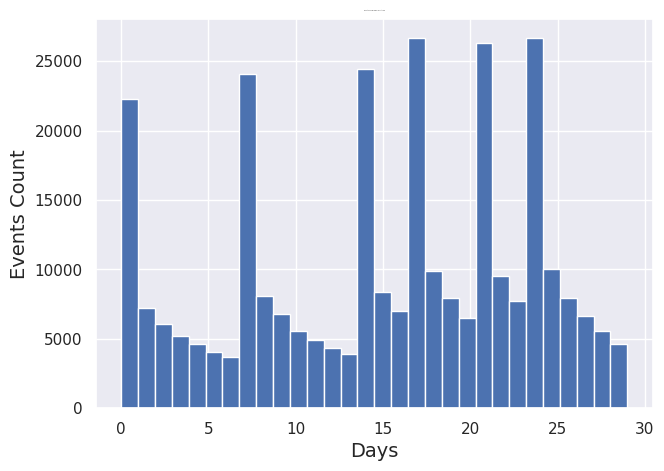

In [ ]:
plt.hist(transcripts['days_since_start'], bins = 30)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Events Count', fontsize = 14)
plt.title('Events Occurrence over time', fontsize = 1)
plt.show()

In [ ]:
transcripts[transcripts['event'] == 'offer received'].groupby('hours_since_start').count()

,person,event,dict_key,dict_value,days_since_start
hours_since_start,,,,,
0,12650,12650,12650,12650,12650
168,12669,12669,12669,12669,12669
336,12711,12711,12711,12711,12711
408,12778,12778,12778,12778,12778
504,12704,12704,12704,12704,12704
576,12765,12765,12765,12765,12765


In [ ]:
# Find how many events occurred in each hour
viewed_hourly = transcripts[transcripts['event'] == 'offer viewed'].value_counts('hours_since_start').sort_index()
completed_hourly = transcripts[transcripts['event'] == 'offer completed'].value_counts('hours_since_start').sort_index()
transaction_hourly = transcripts[transcripts['event'] == 'transaction'].value_counts('hours_since_start').sort_index()
print(len(viewed_hourly), len(completed_hourly), len(transaction_hourly))

120 120 120


In [ ]:
(viewed_hourly.index.values == completed_hourly.index.values).sum(), (completed_hourly.index.values == transaction_hourly.index.values).sum()

(120, 120)

In [ ]:
# Find how many events of each type occurred on each day from Day 0 to Day 29
received_daily = transcripts[transcripts['event'] == 'offer received'].value_counts('days_since_start').sort_index()
viewed_daily = transcripts[transcripts['event'] == 'offer viewed'].value_counts('days_since_start').sort_index()
completed_daily = transcripts[transcripts['event'] == 'offer completed'].value_counts('days_since_start').sort_index()
transaction_daily = transcripts[transcripts['event'] == 'transaction'].value_counts('days_since_start').sort_index()

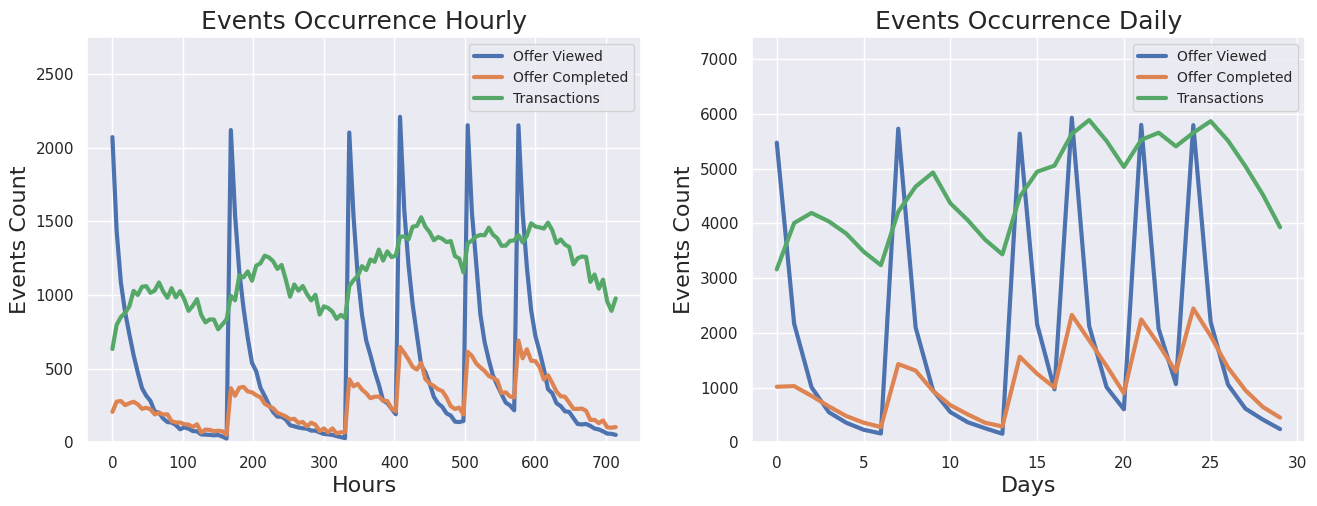

In [ ]:
# Visualize
hours = viewed_hourly.index.values
fig, axs = plt.subplots(1,2, figsize = (14, 5))
# axs[0].stem(received_hourly.index.values, received_hourly, linefmt = ':k')
axs[0].plot(hours, viewed_hourly, lw = 3)
axs[0].plot(hours, completed_hourly, lw = 3)
axs[0].plot(hours, transaction_hourly, lw = 3)
axs[0].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
axs[0].set_ylim([0, 2750])
axs[0].set_xlabel('Hours', fontsize = 16)
axs[0].set_ylabel('Events Count', fontsize = 16)
axs[0].set_title('Events Occurrence Hourly', fontsize = 18)

days = np.arange(30)
# axs[1].stem(received_daily.index.values, received_daily, linefmt = ':k')
axs[1].plot(days, viewed_daily, lw = 3)
axs[1].plot(days, completed_daily, lw = 3)
axs[1].plot(days, transaction_daily, lw = 3)
axs[1].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
axs[1].set_ylim([0, 7400])
axs[1].set_xlabel('Days', fontsize = 16)
axs[1].set_ylabel('Events Count', fontsize = 16)
axs[1].set_title('Events Occurrence Daily', fontsize = 18)

plt.show()

In [ ]:
# Create a df that only contains events about offers
df_event = transcripts[~(transcripts['event'] == 'transaction')]

# Merge df_event with and offers
event_offer = pd.merge(df_event, offers, left_on = 'dict_value', right_on = 'id').drop('id', axis = 1)

# Reorder columns of the merged df
col_names = ['person', 'event', 'offer_alias', 'reward',
       'channels', 'difficulty', 'duration', 'offer_type', 'hours_since_start', 'days_since_start', 'dict_key', 'dict_value',]
event_offer = event_offer[col_names]

# Drop column `dict_value`, as this is offer id which is hard to identify. This information is provided by column `offer_alias`
event_offer = event_offer.drop('dict_value', axis = 1)
event_offer.sample(3)

,person,event,offer_alias,reward,channels,difficulty,duration,offer_type,hours_since_start,days_since_start,dict_key
78920,e28ff05c85ee48f4b7d25eabfbd63f3a,offer received,D,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,504,21,offer id
143364,73ec3a37053c4d5893efedf53e0473eb,offer completed,C,10,"['email', 'mobile', 'social']",10,7,bogo,354,14,offer_id
164553,3b9e53675c964a78a3f49e0870f671ac,offer viewed,J,0,"['email', 'mobile', 'social']",0,3,informational,516,21,offer id


In [ ]:
# Find out the number of time being received for each offer
offer_received = event_offer[event_offer['event'] == 'offer received']
p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)

# Find out the number of time being completed for each offer
offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

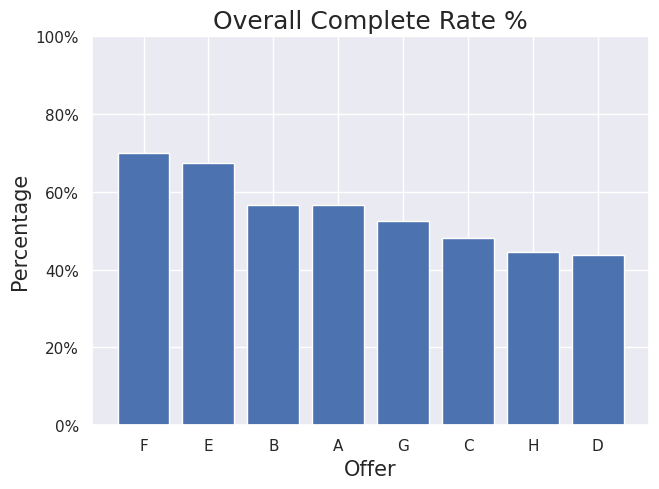

In [ ]:
# Overall completion rate of each offer
overall_complete_rate = (p2.sort_index() / p0.sort_index()).sort_values(ascending = False)

# Visualize
plt.bar(x = overall_complete_rate.index.values, height = overall_complete_rate.values)
plt.title('Overall Complete Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

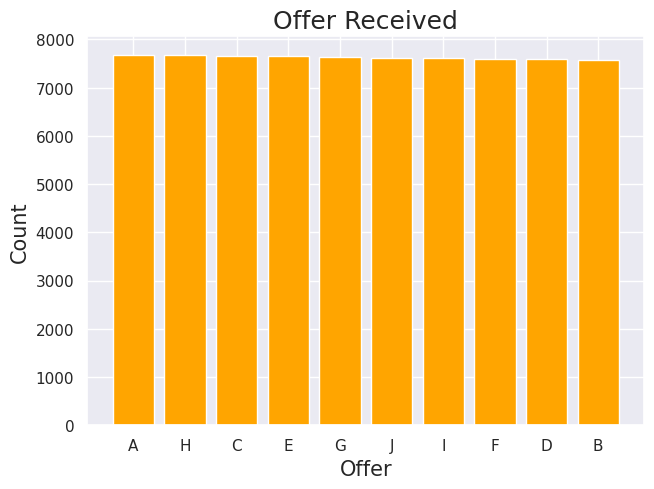

In [ ]:
# offer_received = event_offer[event_offer['event'] == 'offer received']
# p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)
plt.bar(x = np.arange(len(p0)), height = p0.values, tick_label = p0.index.values, color = 'orange')
plt.title('Offer Received', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

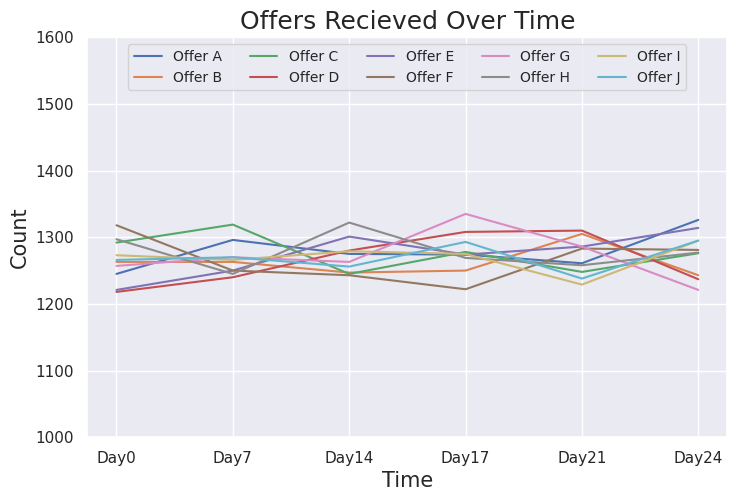

In [ ]:
# Find out how many time each offer were received on each receiving day
num_offers = offers.shape[0]
each_offer_received = pd.DataFrame(index = received_daily.index.values)
for col in ascii_uppercase[:num_offers]:
    each_offer_received[col] = offer_received[offer_received['offer_alias'] == col].value_counts('days_since_start').sort_index()
each_offer_received.index = ['Day' + str(x) for x in received_daily.index.values]

# Visualize
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8))

for col in ascii_uppercase[:num_offers]:
    ax.plot(np.arange(6), each_offer_received[col])

ax.set_ylim([1000,1600])
ax.set_xticks(np.arange(6))
ax.set_xticklabels(each_offer_received.index.values)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
legend_str = ['Offer ' + i for i in ascii_uppercase[:num_offers]]
plt.legend(legend_str, loc = 'upper center', ncol = 5, fontsize = 10)
plt.title('Offers Recieved Over Time', fontsize = 18)
plt.show()

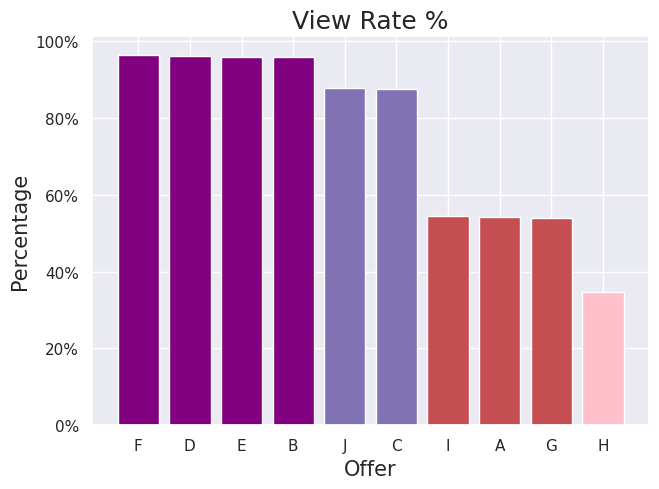

In [ ]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
p1 = offer_viewed.value_counts('offer_alias').sort_values(ascending = False)
p1_rate = (p1.sort_index() / p0.sort_index()).sort_values(ascending = False)
plt.bar(x = np.arange(len(p1)), height = p1_rate.values, tick_label = p1_rate.index.values,
       color = ['purple', 'purple','purple', 'purple', 'm', 'm','r', 'r', 'r', 'pink'])
plt.title('View Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

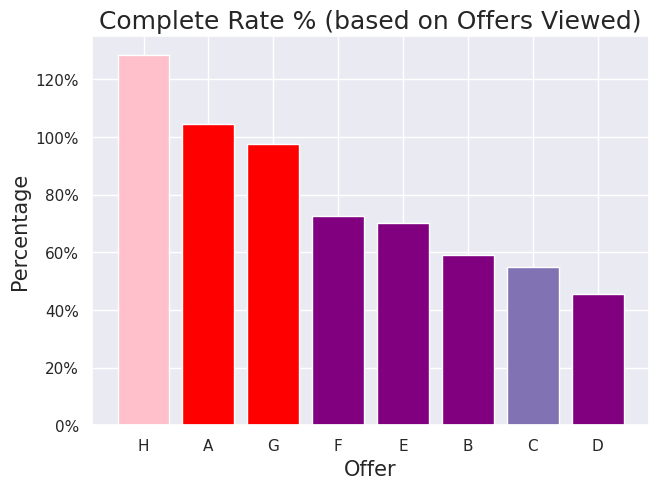

In [ ]:
# offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

p2_rate = (p2.sort_index() / p1.sort_index()).sort_values(ascending = False)
color_list = ['pink', 'red', 'red', 'purple', 'purple', 'purple', 'm', 'purple']
plt.bar(x = p2_rate.index.values, height = p2_rate.values, color = color_list)
plt.title('Complete Rate % (based on Offers Viewed)', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.4, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%', '120%'])
plt.show()

In [ ]:
# Create a new df to hold the relavent variables
offers_added = offers.assign(view_rate = p1_rate.sort_index().values,
                            complete_rate = p2_rate.sort_index().values)

# Set `offer_alias` as index
offers_added.set_index('offer_alias', inplace = True)

# From the new df, extract `view_rate`, 'complete_rate' and other numeric columns
offers_numeric = offers_added.select_dtypes(include = 'number')
offers_numeric.head()

,reward,difficulty,duration,view_rate,complete_rate
offer_alias,,,,,
A,5,5,7,0.543311,1.043874
B,5,5,5,0.959451,0.591410
C,10,10,7,0.876991,0.549136
D,10,10,5,0.961148,0.456426
E,3,7,7,0.959587,0.702740


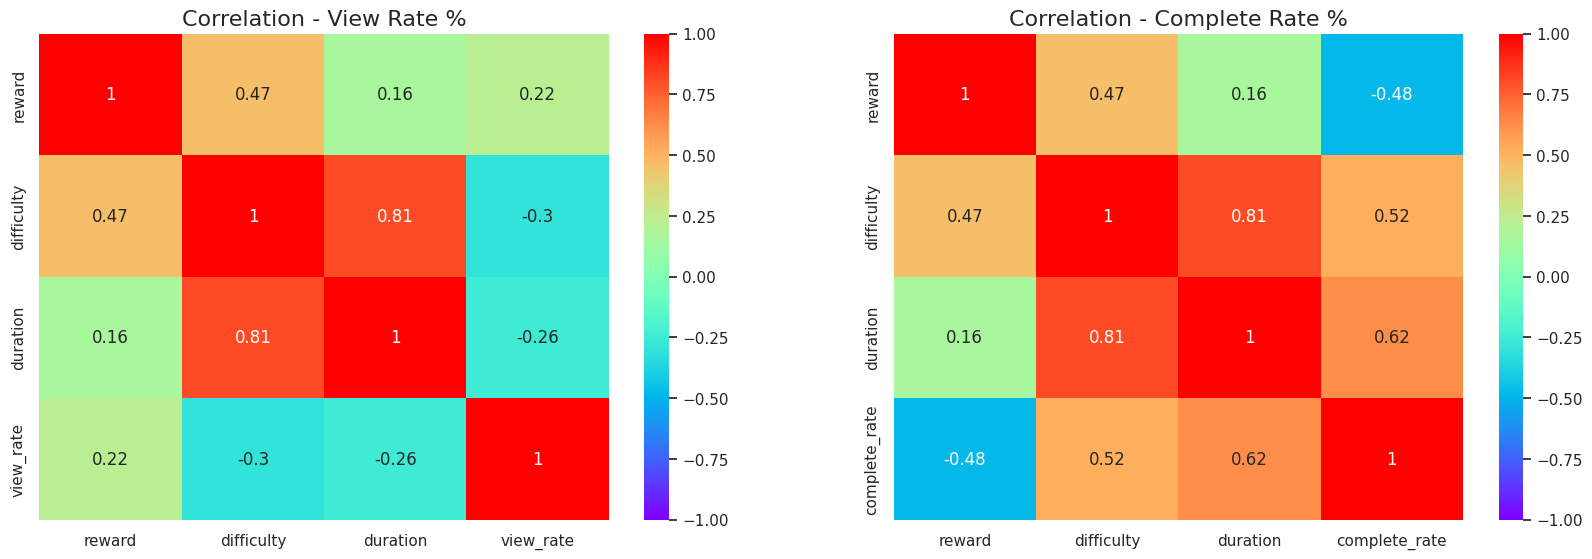

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (18, 6))
sns.heatmap(offers_numeric.iloc[:, :-1].corr(), cmap = 'rainbow',
            annot = True, vmin = -1, vmax = 1, ax = axs[0])
axs[0].set_title('Correlation - View Rate %', fontsize = 16)

sns.heatmap(offers_numeric.iloc[:, [0,1,2,4]].corr(), cmap = 'rainbow',
            annot = True, vmin = -1, vmax = 1, ax = axs[1])
axs[1].set_title('Correlation - Complete Rate %', fontsize = 16)
plt.show()

In [ ]:
# Create an empty df with columns needed
customer_behavior = pd.DataFrame(columns = ['person', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent'])

In [ ]:
# Remove rows of customers with missing gender and income
id_to_remove = missing_income['id']
transcripts_filtered = transcripts[~transcripts['person'].isin(id_to_remove)].reset_index(drop = True)

# Add data to `person`, ordered in ascending order
customer_behavior['person'] = transcripts_filtered.value_counts('person').sort_index().index.values

In [ ]:
# Aggregate df transcripts
transcripts_filtered = transcripts_filtered.sort_values('person')
transcripts_grouped = transcripts_filtered.groupby(['person', 'event']).count()
transcripts_grouped.head()

dict_key  dict_value  \
person                           event                                   
0009655768c64bdeb2e877511632db8f offer completed         3           3   
                                 offer received          5           5   
                                 offer viewed            4           4   
                                 transaction             8           8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed         3           3   

                                                  hours_since_start  \
person                           event                                
0009655768c64bdeb2e877511632db8f offer completed                  3   
                                 offer received                   5   
                                 offer viewed                     4   
                                 transaction                      8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed                  3   

                                                  days_since_start  
person                           event                              
0009655768c64bdeb2e877511632db8f offer completed                 3  
                                 offer received                  5  
                                 offer viewed                    4  
                                 transaction                     8  
0011e0d4e6b944f998e987f904e8c1e5 offer completed                 3

In [ ]:
# Set `person` as index for easy slicing
customer_behavior.set_index('person', inplace = True)

# Add data to `num_received`, `num_viewed`, `num_completed` and `num_transactions`
for person_id in customer_behavior.index.values:
    if (person_id, 'offer received') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_received'] = transcripts_grouped.loc[(person_id, 'offer received'), 'dict_key']
    if (person_id, 'offer viewed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_viewed'] = transcripts_grouped.loc[(person_id, 'offer viewed'), 'dict_key']
    if (person_id, 'offer completed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_completed'] = transcripts_grouped.loc[(person_id, 'offer completed'), 'dict_key']
    if (person_id, 'transaction') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_transactions'] = transcripts_grouped.loc[(person_id, 'transaction'), 'dict_key']

In [ ]:
# Calculate how much money each customer spent during the month of the campaign
money_spent = transcripts_filtered[transcripts_filtered['event'] == 'transaction'].groupby('person').agg({'dict_value': 'sum'})

# Add to `money_spent`
customer_behavior['money_spent'] = money_spent
customer_behavior.head(3)

,num_received,num_viewed,num_completed,num_transactions,money_spent
person,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,8,127.6
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,5,3,3,8,196.86


In [ ]:
customer_behavior.isna().sum()

num_received           5
num_viewed           150
num_completed       2839
num_transactions     333
money_spent          333
dtype: int64

In [ ]:
 # Replace NA with 0
customer_behavior.fillna(0, inplace = True)
customer_behavior.isna().sum()

num_received        0
num_viewed          0
num_completed       0
num_transactions    0
money_spent         0
dtype: int64

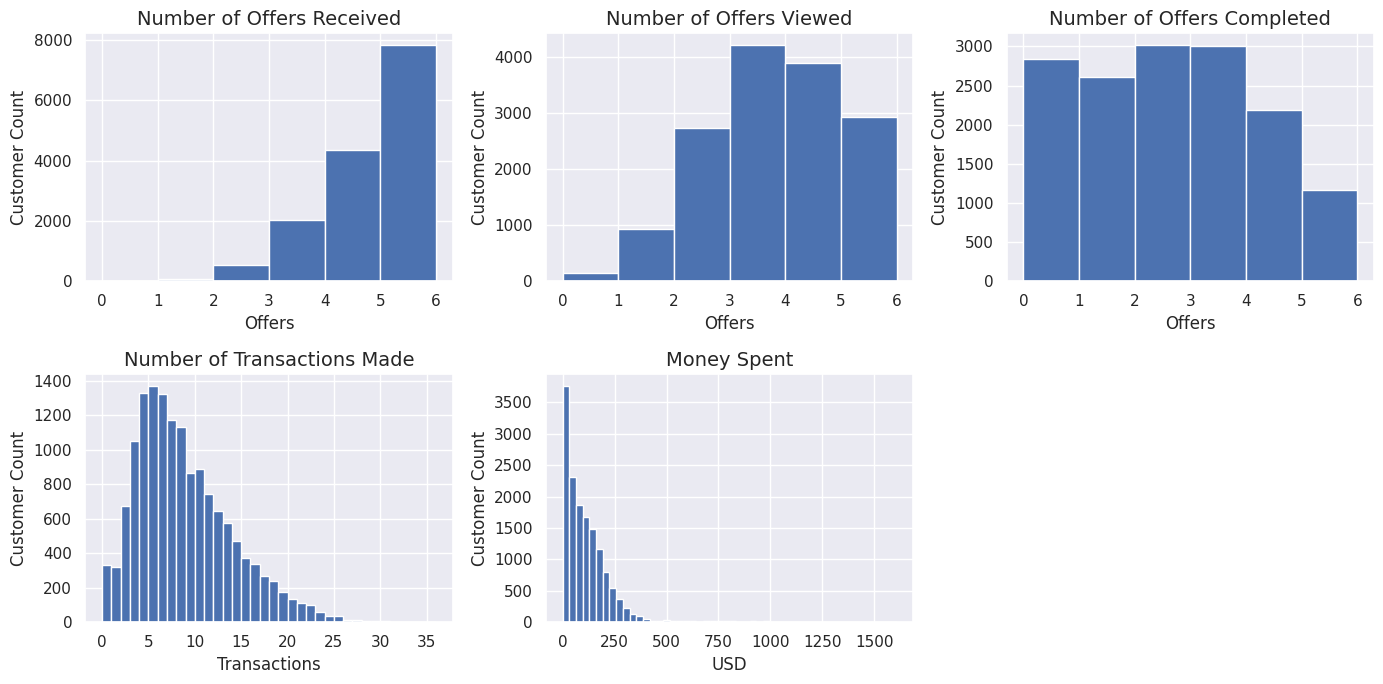

In [ ]:
# Check the features with plots
fig, axs = plt.subplots(2,3, figsize = (14, 7))
fig_titles = ['Number of Offers Received', 'Number of Offers Viewed', 'Number of Offers Completed', 'Number of Transactions Made', 'Money Spent']
x_labels = ['Offers', 'Offers','Offers','Transactions','USD']
y_labels = 'Customer Count'

sub_row, sub_col = 0, 0

for i in range(5):
    if i < 3:
        sub_row = 0
        sub_col = i
        bins = customer_behavior.iloc[:, i].max()
        axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
        axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)

    else:
        sub_row = 1
        sub_col = i - 3
        if i == 3:
            bins = customer_behavior.iloc[:, i].max()
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
        else:
            bins = 50
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)

    axs[sub_row, sub_col].set_title(fig_titles[i], fontsize = 14)
    axs[sub_row, sub_col].set_xlabel(x_labels[i], fontsize = 12)

axs[1,2].set_axis_off()
plt.tight_layout()
plt.show()


In [ ]:
# Keep a copy of the df with `num_received`
customer_behavior_with_num_received = customer_behavior.copy()

# Drop `num_received`
customer_behavior.drop('num_received', axis = 1, inplace = True)
customer_behavior.head(3)

,num_viewed,num_completed,num_transactions,money_spent
person,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60
0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86


In [ ]:
customer_behavior['money_spent'].describe()

count    14825.000000
mean       117.028155
std        129.965016
min          0.000000
25%         31.450000
50%         87.040000
75%        160.900000
max       1608.690000
Name: money_spent, dtype: float64

In [ ]:
# Remove rows with top 2% in `money_spent`
q = customer_behavior['money_spent'].quantile(0.98)
rows_top_money_spent = customer_behavior[customer_behavior['money_spent'] >= q]

person_top_money_spent = rows_top_money_spent.index.values
customer_top_money_spent_removed = customer_behavior[customer_behavior['money_spent'] < q]

print('Number of rows removed:', rows_top_money_spent.shape[0])

Number of rows removed: 297


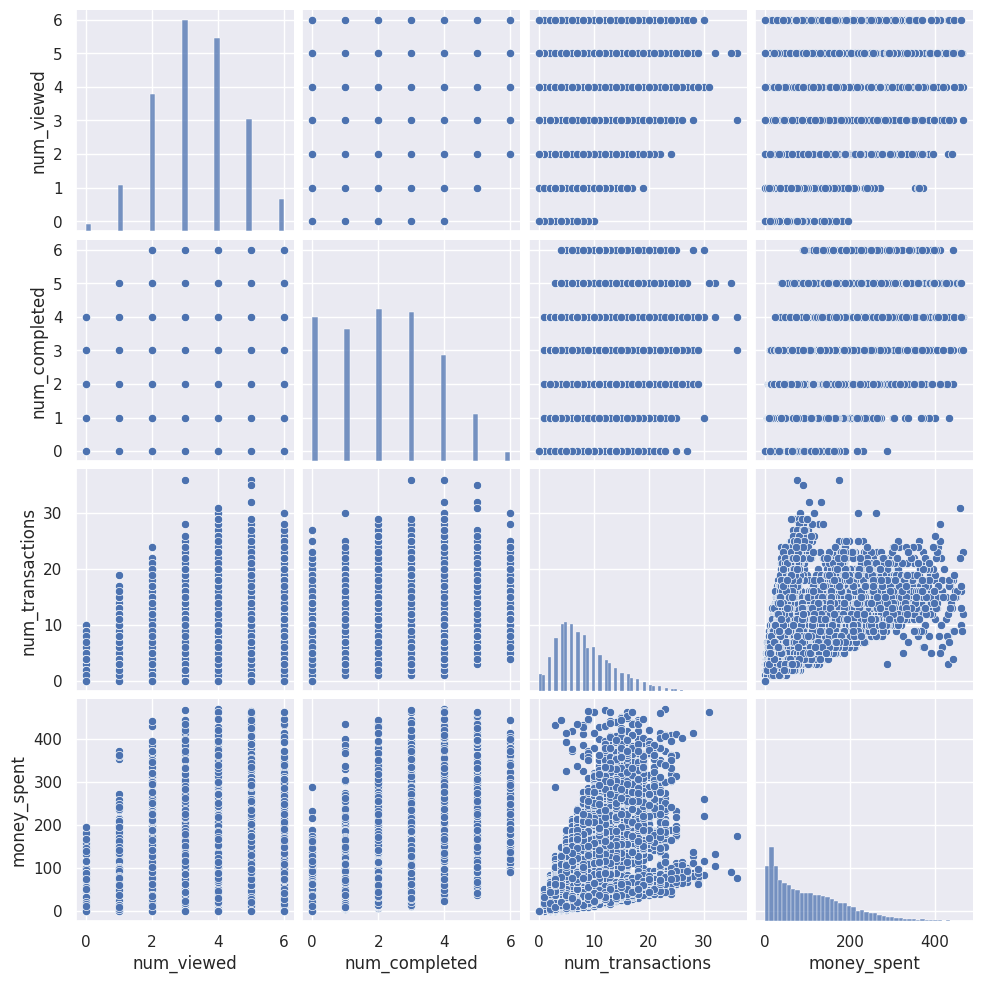

In [ ]:
customer_behavior_filtered = customer_top_money_spent_removed.copy()
sns.pairplot(customer_behavior_filtered); plt.show()

In [ ]:
scaler_customer_behavior = StandardScaler()
scaler_customer_behavior.fit(customer_behavior_filtered)
customer_behavior_scaled = scaler_customer_behavior.transform(customer_behavior_filtered)
pd.DataFrame(data = customer_behavior_scaled, columns = customer_behavior_filtered.columns.values).head(3)

,num_viewed,num_completed,num_transactions,money_spent
0,0.501233,0.531352,-0.060069,0.277234
1,1.276977,0.531352,-0.639666,-0.281415
2,-0.274511,0.531352,-0.060069,1.080974


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

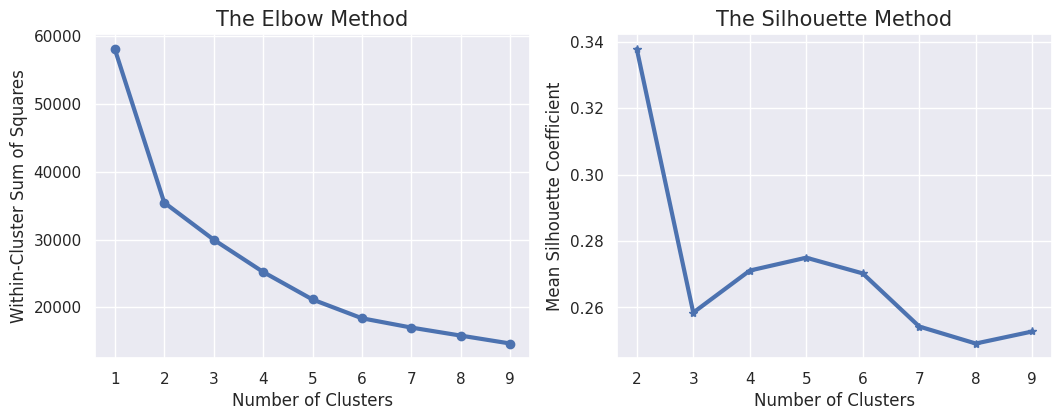

In [ ]:
df_feature = customer_behavior_scaled
wcss = []
sil_score = []
max_clusters = 10

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(df_feature)
    # calculate wcss for the Elbow Method
    wcss.append(kmeans.inertia_)

    # calculate the mean Silhouette coefficient
    if k >= 2:
        labels = kmeans.labels_
        sil_score.append(metrics.silhouette_score(df_feature, labels))

        # Plot
fig, axs = plt.subplots(1,2, figsize = (11,4))
axs[0].plot(np.arange(1, max_clusters), wcss, marker = 'o', lw = 3)
axs[0].set_xlabel('Number of Clusters', fontsize = 12)
axs[0].set_ylabel('Within-Cluster Sum of Squares')
axs[0].set_title('The Elbow Method', fontsize = 15)

axs[1].plot(np.arange(2, max_clusters), sil_score, marker = '*' , lw = 3)
axs[1].set_xlabel('Number of Clusters', fontsize = 12)
axs[1].set_ylabel('Mean Silhouette Coefficient')
axs[1].set_title('The Silhouette Method', fontsize = 15)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    4018
1    2901
2    2649
3    1584
4    3376
dtype: int64

 ************************************************************
Silhouette Score: 0.274991463208214

 ************************************************************
        num_viewed num_completed num_transactions money_spent
              mean          mean             mean        mean
cluster                                                      
0              2.1           0.7              5.0        34.6
1              4.5           4.1             12.2       223.0
2              4.5           1.5              4.5        50.3
3              3.5           2.0             17.1        72.2
4              2.8           2.9              7.7       140.2


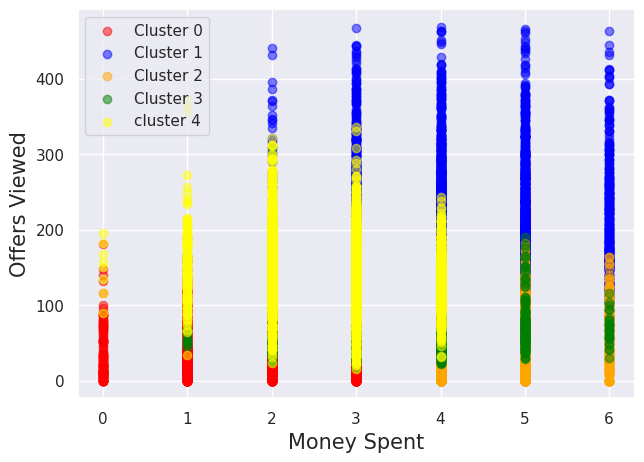

In [ ]:
k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters = k, random_state = 10)
kmeans.fit_transform(df_feature)
customer_with_cluster = customer_behavior_filtered.assign(cluster = kmeans.labels_)
print(customer_with_cluster.value_counts('cluster').sort_index())

line_sep = '*' * 60
print('\n', line_sep)
print('Silhouette Score:', metrics.silhouette_score(df_feature, labels = kmeans.labels_))

#
cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])
print('\n', line_sep)
print(cluster_info.round(1))

# Plot
color_list = ['red', 'blue', 'orange', 'green', 'yellow']
legend_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'cluster 4']
for i in range(k):
    plt.scatter(customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'num_viewed'],
               customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'money_spent'],
               c = color_list[i], label = legend_list[i], alpha = 0.5)
plt.ylabel('Offers Viewed', fontsize = 15)
plt.xlabel('Money Spent', fontsize = 15)
plt.legend(legend_list)
plt.show()

In [ ]:
# Split data for train and test
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [ ]:
# Multiclass logistic regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Check test accurracy
y_predict = clf.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.993805918788713


In [ ]:
# K-Nearest Neighbors Classificaiton
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

# Check test accuracy
y_predict = knn.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.9855471438403304


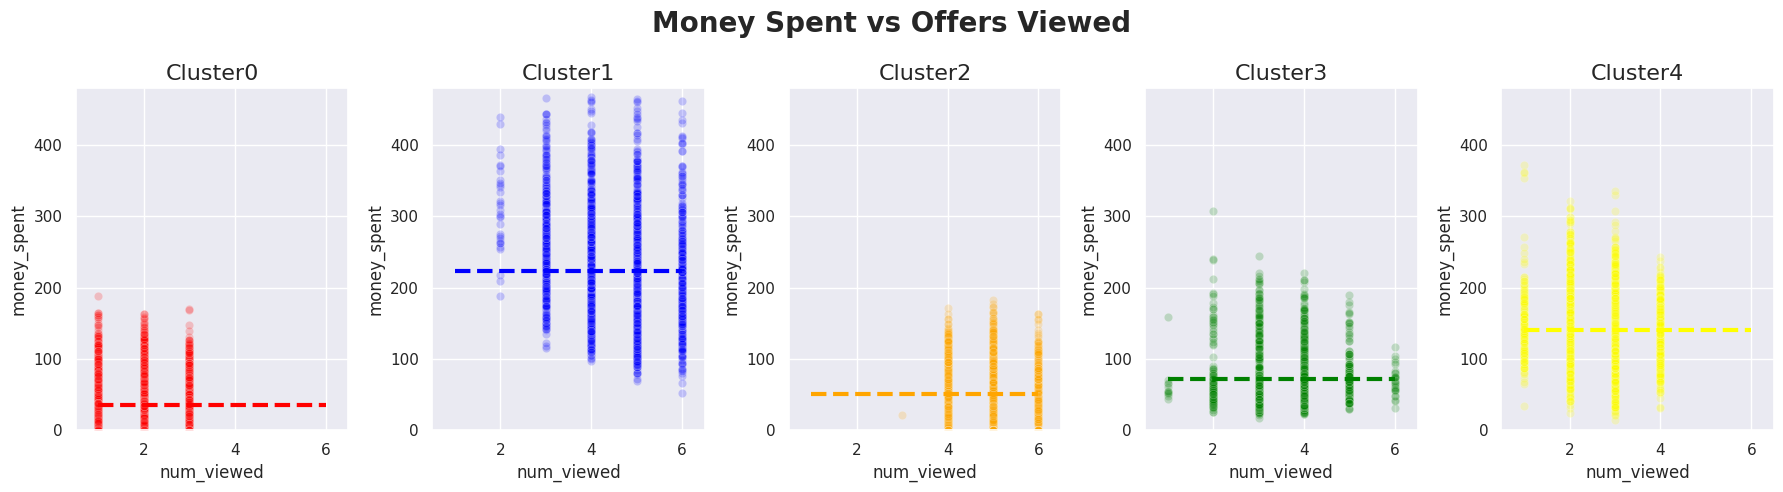

In [ ]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'money_spent', alpha = 0.2, color = color_list[i], ax = axs[i])

    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'money_spent': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)),
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0,480))
fig.suptitle('Money Spent vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

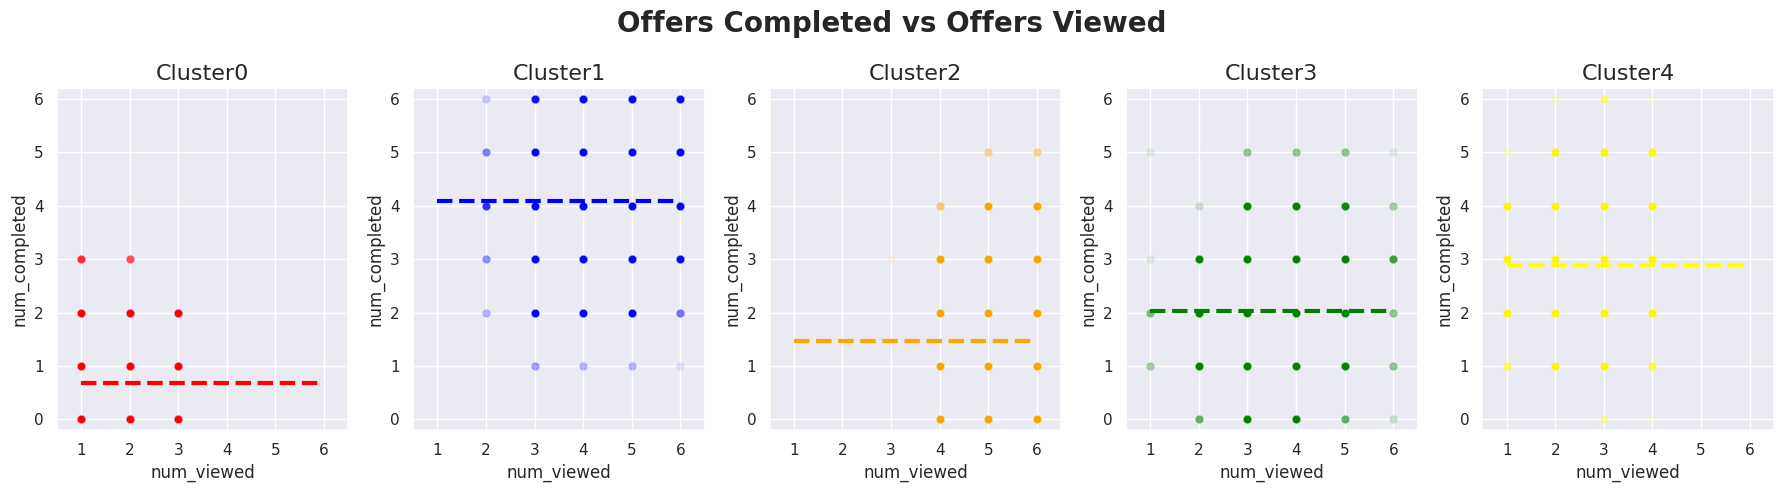

In [ ]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_completed', alpha = 0.1, color = color_list[i], ax = axs[i])

    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_completed': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)),
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((-0.2,6.2))
fig.suptitle('Offers Completed vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

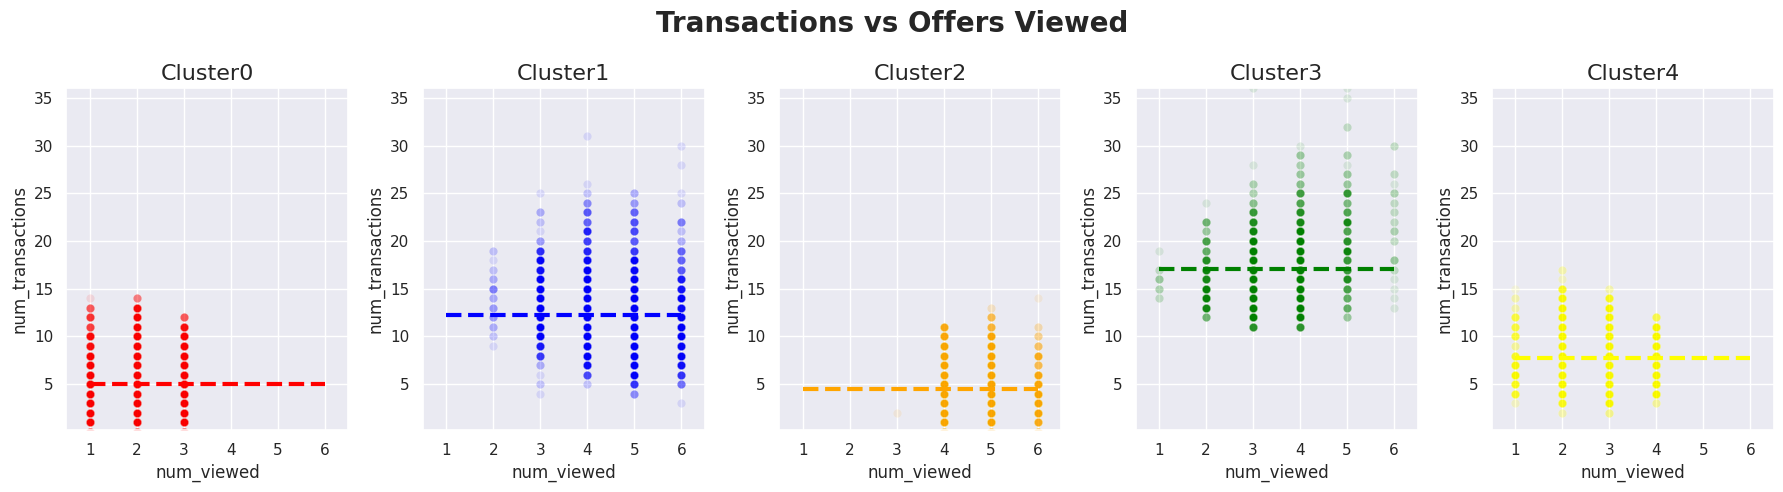

In [ ]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_transactions', alpha = 0.1, color = color_list[i], ax = axs[i])

    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_transactions': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)),
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0.2,36))
fig.suptitle('Transactions vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

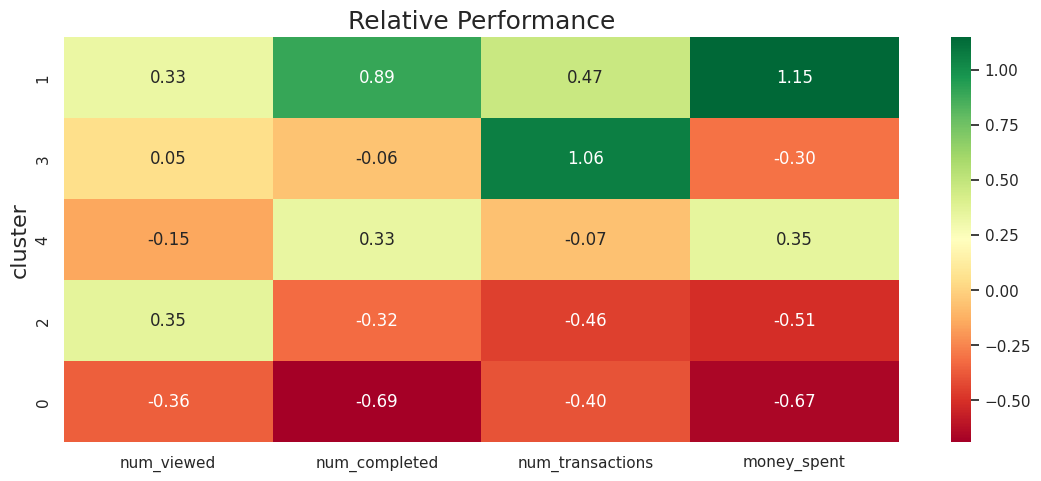

In [ ]:
# Calculate the relative performace of cluster's attribute values compared to all customers as a population
cluster_mean = customer_with_cluster.groupby('cluster').mean()
population_mean = customer_with_cluster.mean()
relative_importance = (cluster_mean / population_mean[0 :-1]) - 1

# Sort clusters by overall (summation) performance
importance_ranking = relative_importance.sum(axis = 1).sort_values(ascending = False).index.values
relative_importance = relative_importance.reindex(importance_ranking)

# Plot the heatmap
plt.figure(figsize = (12, k))
plt.title('Relative Performance', fontsize = 18)
plt.xlabel('Feature', fontsize = 16)
plt.ylabel('Cluster', fontsize = 16)
sns.heatmap(data = relative_importance, annot = True, fmt = '.2f', cmap = 'RdYlGn')
plt.show()

In [ ]:
# Calculated the mean of all features for each cluster
temp = pd.merge(customer_with_cluster, customer_behavior_with_num_received['num_received'], left_index = True, right_index = True)
cluster_means = temp.groupby('cluster').mean().round(3)
cluster_means = cluster_means.reindex(importance_ranking)
cluster_means

,num_viewed,num_completed,num_transactions,money_spent,num_received
cluster,,,,,
1,4.452,4.096,12.223,222.970,5.094
3,3.512,2.028,17.098,72.242,4.674
4,2.845,2.887,7.744,140.156,4.150
2,4.541,1.463,4.529,50.347,5.029
0,2.143,0.671,4.992,34.568,3.881


In [ ]:
# Create the df for summarizing by clusters
cluster_summary = pd.DataFrame(columns = ['cluster', 'frequency', 'avg_purchase_value', 'offer_complete_rate', 'offer_sensitivity'])
cluster_summary['cluster'] = index = np.arange(k)
cluster_summary.set_index('cluster', drop = True, inplace = True)

In [ ]:
# Add values to df `cluster_summary`
cluster_summary['frequency'] = cluster_means['num_transactions'].round(1)
cluster_summary['avg_purchase_value'] = (cluster_means['money_spent'] / cluster_means['num_transactions']).round(1)
cluster_summary['offer_complete_rate'] = (cluster_means['num_completed'] / cluster_means['num_received']).round(2)
cluster_summary['offer_sensitivity'] = (cluster_means['num_completed'] / cluster_means['num_transactions']).round(2)

In [ ]:
# Redorder index
cluster_summary = cluster_summary.reindex(importance_ranking)
cluster_summary

,frequency,avg_purchase_value,offer_complete_rate,offer_sensitivity
cluster,,,,
1,12.2,18.2,0.80,0.34
3,17.1,4.2,0.43,0.12
4,7.7,18.1,0.70,0.37
2,4.5,11.1,0.29,0.32
0,5.0,6.9,0.17,0.13


In [ ]:
# Scale features
rows_top_money_spent_scaled = scaler_customer_behavior.transform(rows_top_money_spent)

# Have a direct look at the clustering result
kmeans.predict(rows_top_money_spent_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int3

In [ ]:
cluster_kmeans = kmeans.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_kmeans, return_counts = True)

print('According to the KMeans model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i]))

According to the KMeans model, customers spending top 2% belong to:
295 customers belongs to Cluster 1.
2 customers belongs to Cluster 4.


In [ ]:
cluster_logistic = clf.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_logistic, return_counts = True)

print('According to the Logistic Regression model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i]))

According to the Logistic Regression model, customers spending top 2% belong to:
293 customers belongs to Cluster 1.
4 customers belongs to Cluster 4.


In [ ]:
cluster_KNN = knn.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_KNN, return_counts = True)

print('According to the KNN model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i]))

According to the KNN model, customers spending top 2% belong to:
297 customers belongs to Cluster 1.


In [ ]:
# Concatenate top 2% spenders with the rest of the customers (behavior)
customer_behavior_clustered = temp[rows_top_money_spent.columns.values]
customer_behavior_clustered = customer_behavior_clustered.assign(cluster = temp['cluster'])
customer_behavior_clustered = pd.concat([customer_behavior_clustered, rows_top_money_spent], axis = 0)

# Assign these customers to cluster 1
customer_behavior_clustered.fillna(value = 1, inplace = True)

# Convert cluster label from float to integers
customer_behavior_clustered['cluster'] = customer_behavior_clustered['cluster'].astype('int')

In [ ]:
# Reset index for `customer_behavior_clustered`
customer_behavior_clustered.reset_index(inplace = True)
# Merge
customer_behavior_profile = pd.merge(customer_behavior_clustered, customers,
                                    left_on = 'person', right_on = 'id').drop(['id'], axis = 1)

In [ ]:
# Add column `cluster_alias`
customer_behavior_profile['cluster_alias'] = customer_behavior_profile['cluster'].map({1: 'Most-Valables',
                                                                                       3: 'Regulars',
                                                                                       4: 'High-Potentials',
                                                                                       2: 'Offer-Viewers',
                                                                                       0: 'Low-Engagers'})
customer_behavior_profile.head(3)

,person,num_viewed,num_completed,num_transactions,money_spent,cluster,gender,age,became_member_on,income,age_group,income_group,cluster_alias
0,0009655768c64bdeb2e877511632db8f,4,3,8,127.60,4,M,33,2017-04-21,72000.0,26-35ys,60-75k,High-Potentials
1,0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46,2,O,40,2018-01-09,57000.0,36-45ys,45-60k,Offer-Viewers
2,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,4,F,59,2016-03-04,90000.0,56-65ys,75-90k,High-Potentials


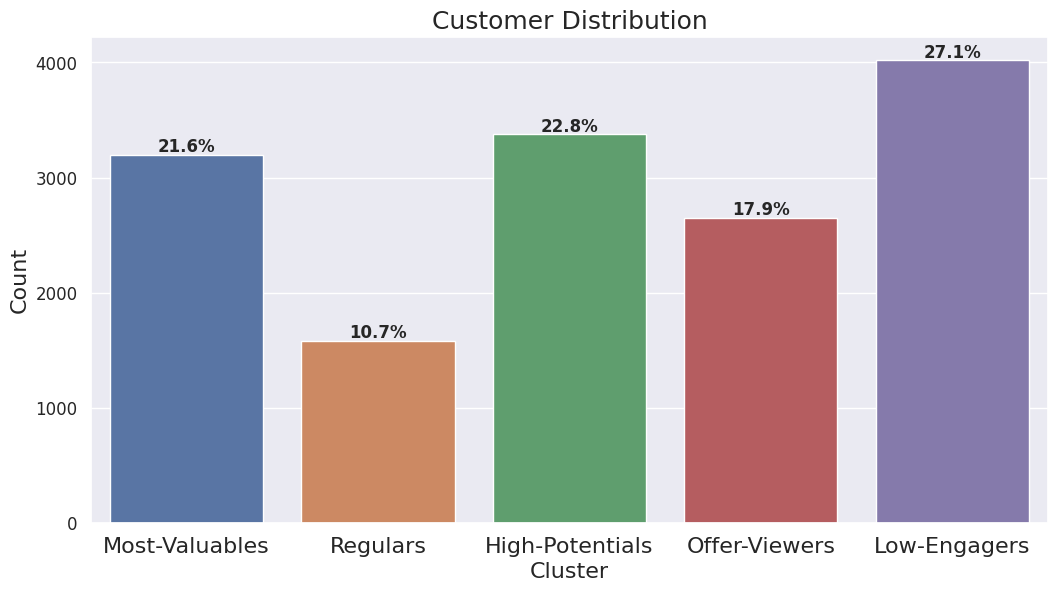

In [ ]:

p = customer_behavior_profile.value_counts('cluster').reindex(importance_ranking)
cluster_pct = list((p/p.sum() * 100).round(2))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
fig = plt.figure(figsize = (11,6))
ax = sns.barplot(x = p.index.values, y = p.values, order = importance_ranking)
patches = ax.patches
for i in range(len(p)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 25
    ax.annotate(text = '{:.1f}%'.format(cluster_pct[i]), xy = (x, y), ha = 'center',
               fontsize = 12, weight = 'bold')

plt.title('Customer Distribution', fontsize = 18)
plt.xticks(ticks = np.arange(len(p)), labels = cluster_names, fontsize = 16)
plt.yticks(ticks = np.arange(0, 5000, 1000), fontsize = 12)
plt.xlabel('Cluster', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

In [ ]:
segment_means = customer_behavior_profile.groupby('cluster').agg({'age': 'mean', 'income': 'mean'}).reindex(importance_ranking)
segment_means.index = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
segment_means.round(2).head()

,age,income
Most-Valuables,56.10,71735.46
Regulars,47.33,48782.83
High-Potentials,57.93,74534.66
Offer-Viewers,55.53,65218.95
Low-Engagers,52.10,59371.08


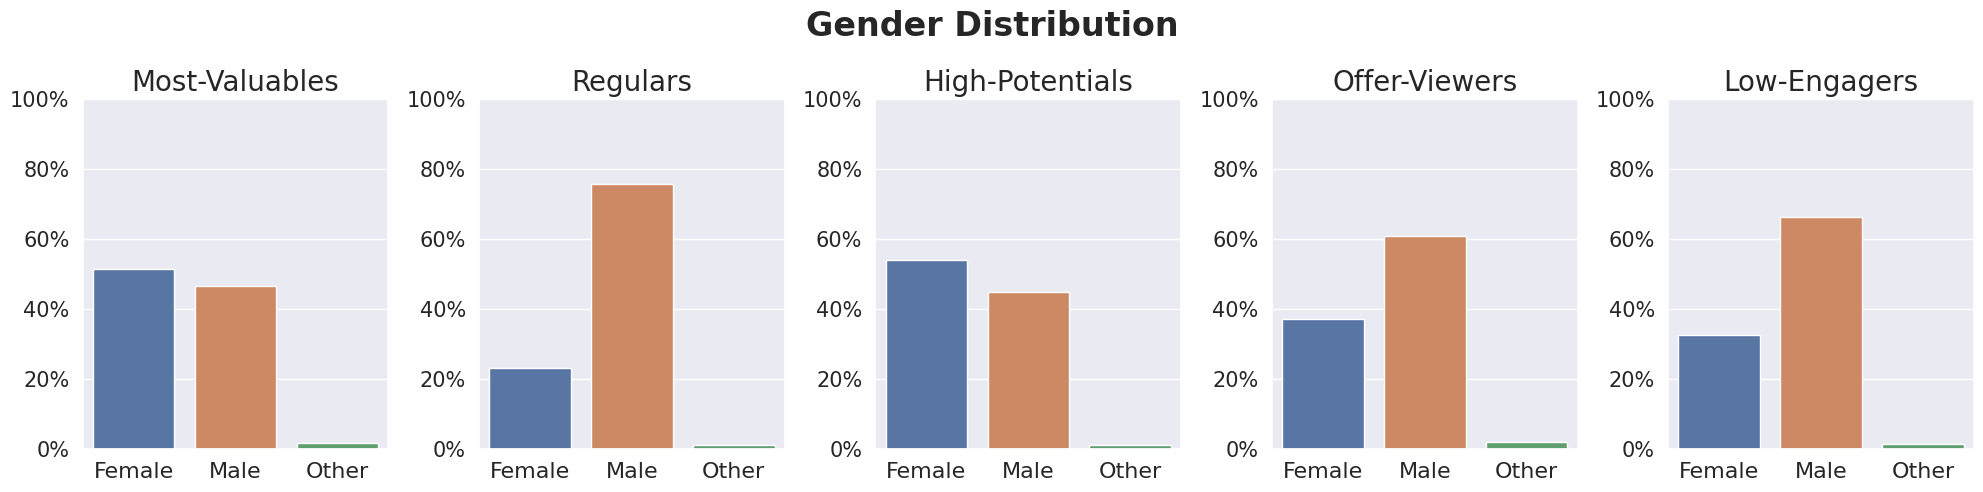

In [ ]:
num_clusters = customer_behavior_profile['cluster'].nunique()
fig, axs = plt.subplots(1, num_clusters, figsize = (20,5))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
xticklabels = ['Female', 'Male', 'Other']
yticks = np.arange(0,1.2, 0.2)
yticklabels = [str(n) + '%' for n in (yticks * 100).astype(int)]
for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == importance_ranking[i]].value_counts('gender').sort_index()
    sns.barplot(x = p.index.values, y = p.values / p.sum(), ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_xticklabels(xticklabels, fontsize = 16)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(yticklabels, fontsize = 15)

plt.suptitle('Gender Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

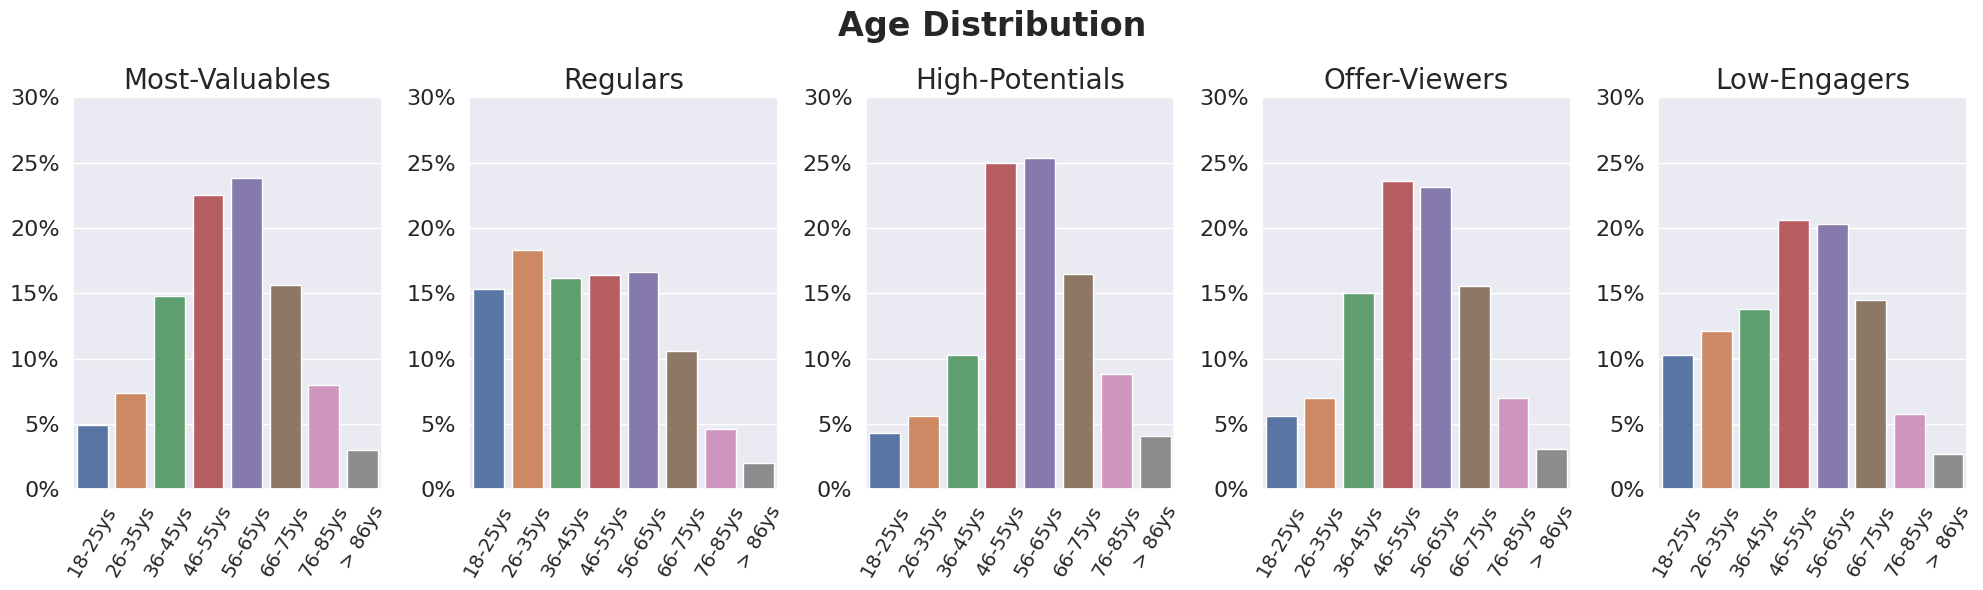

In [ ]:
fig, axs = plt.subplots(1, num_clusters, figsize = (20,6))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
age_group_list = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']
yticks = np.arange(0,0.35, 0.05)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == importance_ranking[i]].value_counts('age_group').sort_index()
    sns.barplot(x = p.index.values, y = p.values / p.sum(), ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(ytick_labels, fontsize = 16)
    axs[i].set_xticklabels(age_group_list, rotation=60, fontsize = 14)

plt.suptitle('Age Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

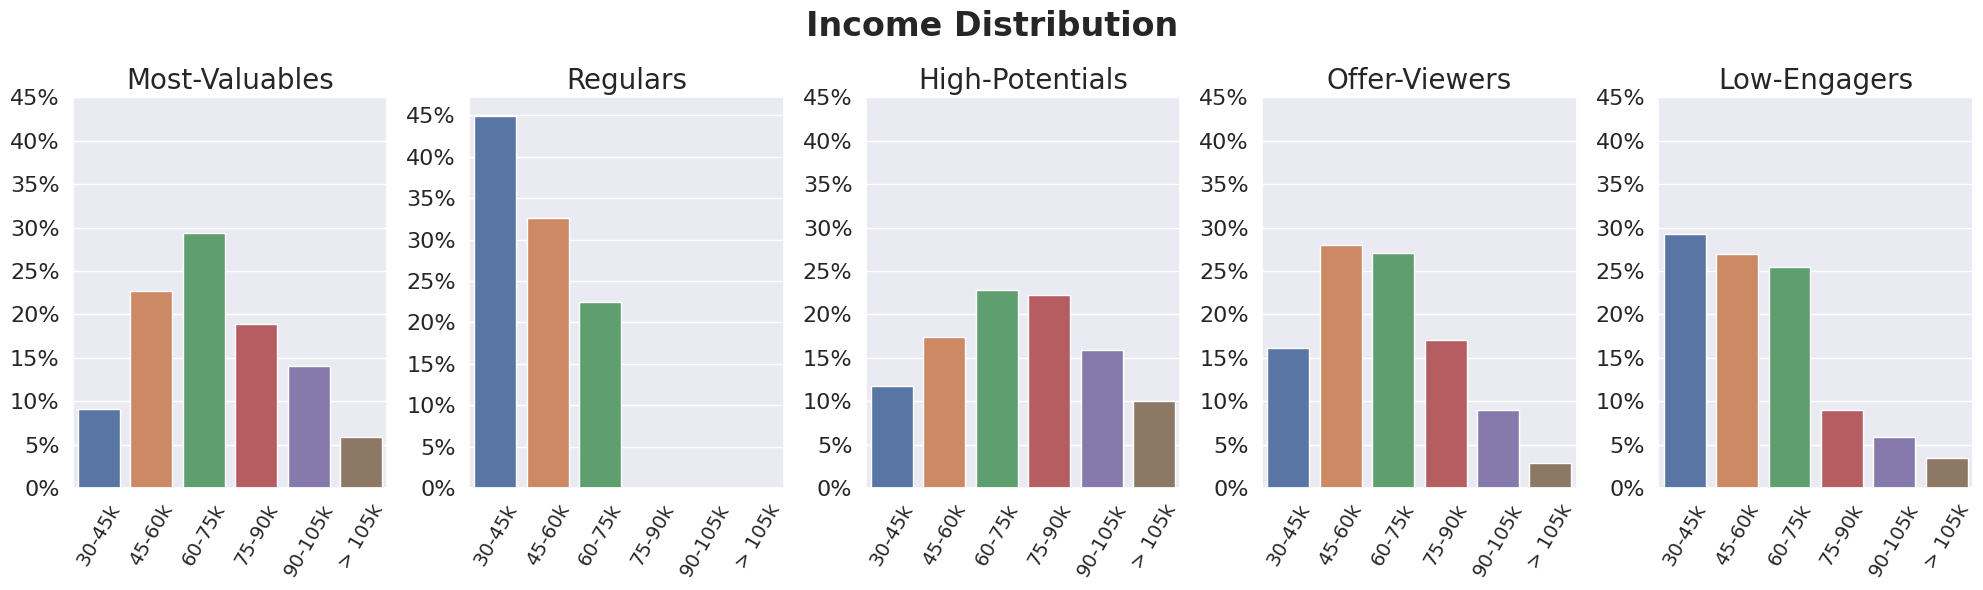

In [ ]:
fig, axs = plt.subplots(1, num_clusters, figsize = (20,6))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
income_group_list = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k']
yticks = np.arange(0,0.5, 0.05)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]
for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == importance_ranking[i]].value_counts('income_group').sort_index()
    sns.barplot(x = p.index.values, y = p.values / p.sum(), ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(ytick_labels, fontsize = 16)
    axs[i].set_xticklabels(income_group_list[: p.shape[0]], rotation=60, fontsize = 14)

plt.suptitle('Income Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [ ]:
# Add column `channel_alias` for easier referencing
event_offer['channel_alias'] = event_offer['channels'].map({
    "['web', 'email', 'mobile', 'social']": 1,
    "['email', 'mobile', 'social']": 2,
    "['web', 'email', 'mobile']": 3,
    "['web', 'email']": 4
})

In [ ]:
# Merge
event_offer_customer = pd.merge(customers, event_offer, left_on = 'id', right_on = 'person').drop('id', axis = 1)

# Drop unwanted columns
event_offer_customer.drop(['channels', 'dict_key'], axis = 1, inplace = True)

# Reorder columns
col_names = ['gender', 'age', 'became_member_on', 'income', 'age_group', 'income_group', 'person',
             'event', 'offer_alias', 'channel_alias', 'offer_type',
             'reward', 'difficulty', 'duration',
             'hours_since_start', 'days_since_start'
       ]
event_offer_customer = event_offer_customer[col_names]
event_offer_customer.head(3)

,gender,age,became_member_on,income,age_group,income_group,person,event,offer_alias,channel_alias,offer_type,reward,difficulty,duration,hours_since_start,days_since_start
0,F,55,2017-07-15,112000.0,46-55ys,> 105k,0610b486422d4921ae7d2bf64640c50b,offer received,A,3,bogo,5,5,7,408,17
1,F,55,2017-07-15,112000.0,46-55ys,> 105k,0610b486422d4921ae7d2bf64640c50b,offer completed,A,3,bogo,5,5,7,528,22
2,F,55,2017-07-15,112000.0,46-55ys,> 105k,0610b486422d4921ae7d2bf64640c50b,offer received,I,3,informational,0,0,4,504,21


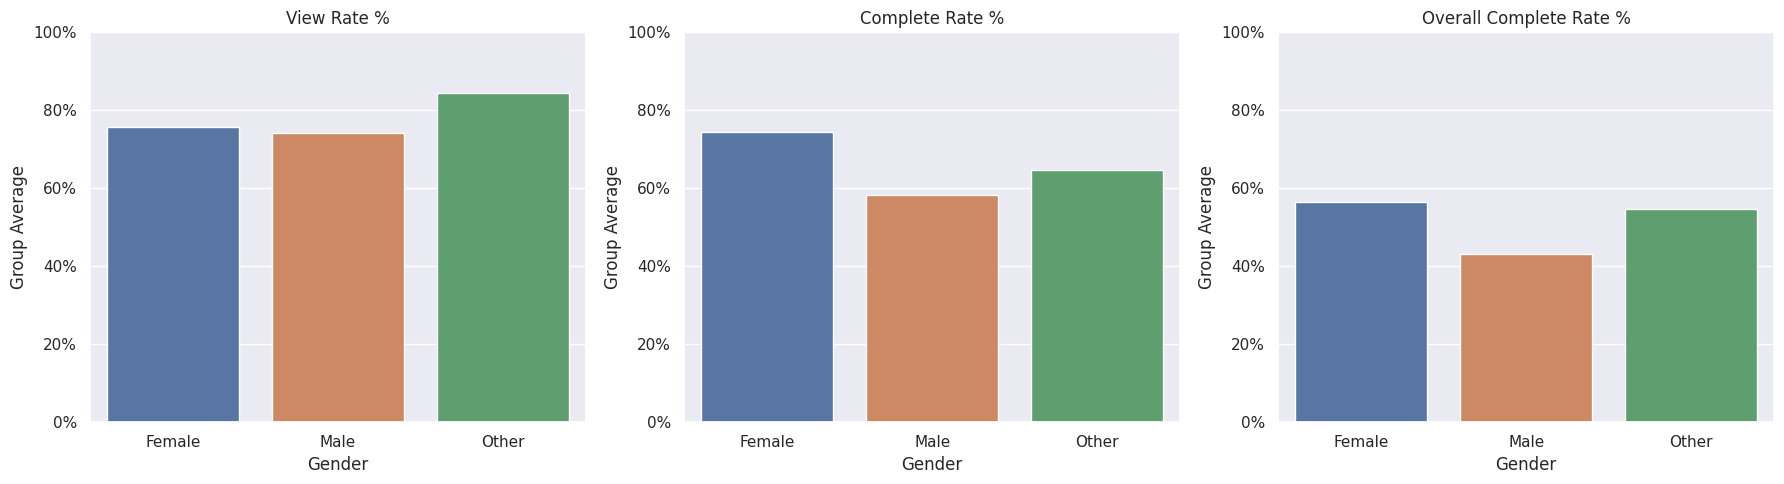

In [ ]:
# Group data
grouped_by_gender = event_offer_customer.groupby(['gender', 'event']).agg({'hours_since_start': 'count'})
gender_list = ['F', 'M', 'O']

# Calculate view rate
view_rate = []
for i in range(len(gender_list)):
    view_rate.append(grouped_by_gender.loc[(gender_list[i], 'offer viewed')] / grouped_by_gender.loc[(gender_list[i], 'offer received')])
view_rate = [x[0] for x in view_rate]

# Calculate complete rate
complete_rate = []
for i in range(len(gender_list)):
    complete_rate.append(grouped_by_gender.loc[(gender_list[i], 'offer completed')] / grouped_by_gender.loc[(gender_list[i], 'offer viewed')])
complete_rate = [x[0] for x in complete_rate]
# Calculate overall complete rate
overall_complete_rate = []
for i in range(len(gender_list)):
    overall_complete_rate.append(grouped_by_gender.loc[(gender_list[i], 'offer completed')] / grouped_by_gender.loc[(gender_list[i], 'offer received')])
overall_complete_rate = [x[0] for x in overall_complete_rate]

# Visualize
xticks = np.arange(len(gender_list))
xticklabels = ['Female', 'Male', 'Other']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, 3, figsize = (18, 5))
sns.barplot(x = xticks, y = view_rate, ax = axs[0])
sns.barplot(x = xticks, y = complete_rate, ax = axs[1])
sns.barplot(x = xticks, y = overall_complete_rate, ax = axs[2])
axs[0].set_title('View Rate %'); axs[0].set_xlabel('Gender'); axs[0].set_ylabel('Group Average')
axs[0].set_xticklabels(xticklabels); axs[0].set_yticks(yticks); axs[0].set_yticklabels(ytick_labels)
axs[1].set_title('Complete Rate %'); axs[1].set_xlabel('Gender'); axs[1].set_ylabel('Group Average')
axs[1].set_xticklabels(xticklabels); axs[1].set_yticks(yticks); axs[1].set_yticklabels(ytick_labels)
axs[2].set_title('Overall Complete Rate %'); axs[2].set_xlabel('Gender'); axs[2].set_ylabel('Group Average')
axs[2].set_xticklabels(xticklabels); axs[2].set_yticks(yticks); axs[2].set_yticklabels(ytick_labels)

plt.tight_layout()
plt.show()

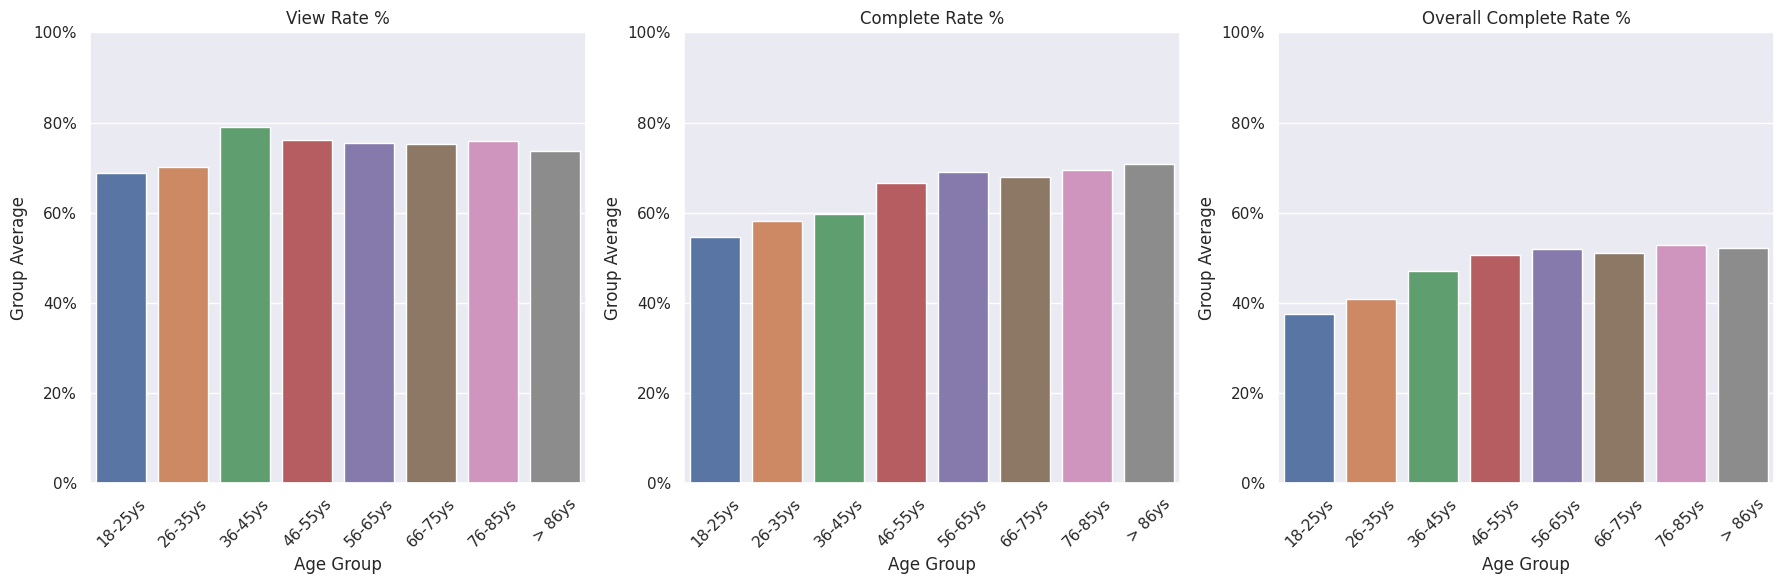

In [ ]:
# Group data
grouped_by_age = event_offer_customer.groupby(['age_group', 'event']).agg({'hours_since_start': 'count'})
age_group_list = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']

# Calculate view rate
view_rate = []
for i in range(len(age_group_list)):
    view_rate.append(grouped_by_age.loc[(age_group_list[i], 'offer viewed')] / grouped_by_age.loc[(age_group_list[i], 'offer received')])
view_rate = [x[0] for x in view_rate]

# Calculate complete rate
complete_rate = []
for i in range(len(age_group_list)):
    complete_rate.append(grouped_by_age.loc[(age_group_list[i], 'offer completed')] / grouped_by_age.loc[(age_group_list[i], 'offer viewed')])
complete_rate = [x[0] for x in complete_rate]
# Calculate overall complete rate
overall_complete_rate = []
for i in range(len(age_group_list)):
    overall_complete_rate.append(grouped_by_age.loc[(age_group_list[i], 'offer completed')] / grouped_by_age.loc[(age_group_list[i], 'offer received')])
overall_complete_rate = [x[0] for x in overall_complete_rate]

# Visualize
xticks = np.arange(len(age_group_list))
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, 3, figsize = (18, 6))
sns.barplot(x = np.arange(len(age_group_list)), y = view_rate, ax = axs[0])
sns.barplot(x = np.arange(len(age_group_list)), y = complete_rate, ax = axs[1])
sns.barplot(x = np.arange(len(age_group_list)), y = overall_complete_rate, ax = axs[2])
axs[0].set_title('View Rate %'); axs[0].set_xlabel('Age Group'); axs[0].set_ylabel('Group Average')
axs[0].set_xticklabels(age_group_list, rotation=45); axs[0].set_yticks(yticks); axs[0].set_yticklabels(ytick_labels)
axs[1].set_title('Complete Rate %'); axs[1].set_xlabel('Age Group'); axs[1].set_ylabel('Group Average')
axs[1].set_xticklabels(age_group_list, rotation=45); axs[1].set_yticks(yticks); axs[1].set_yticklabels(ytick_labels)
axs[2].set_title('Overall Complete Rate %'); axs[2].set_xlabel('Age Group'); axs[2].set_ylabel('Group Average')
axs[2].set_xticklabels(age_group_list, rotation=45); axs[2].set_yticks(yticks); axs[2].set_yticklabels(ytick_labels)

plt.tight_layout()
plt.show()

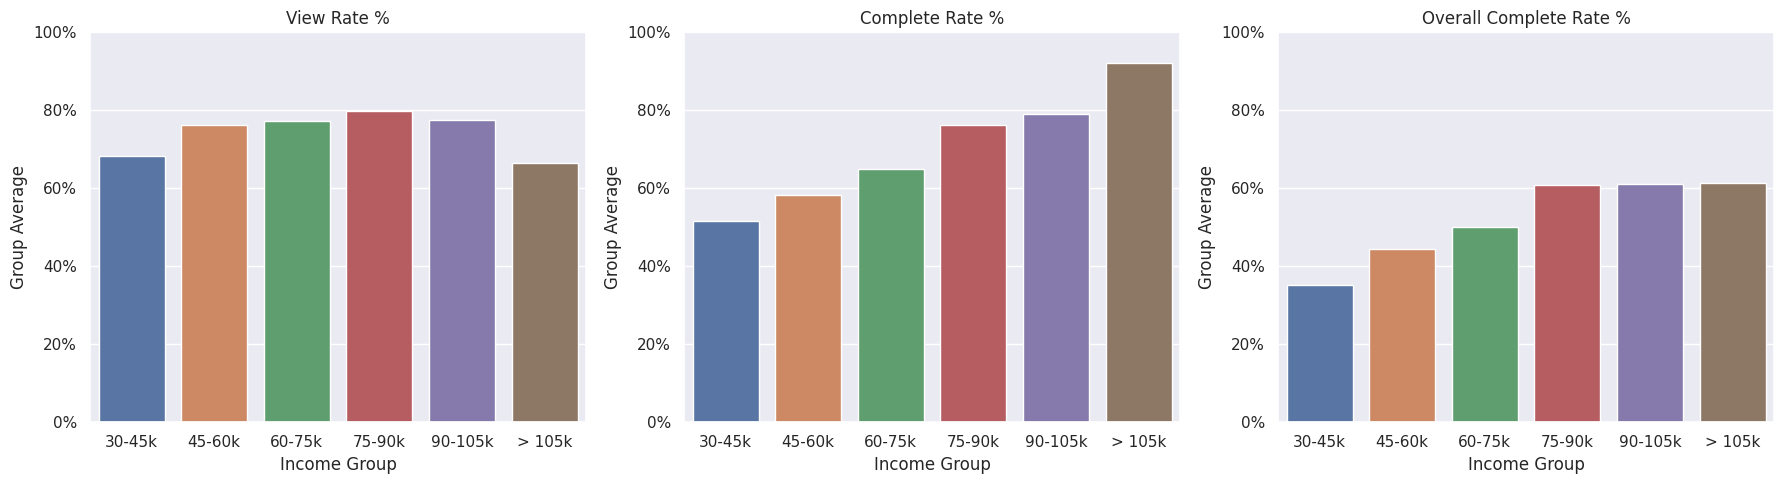

In [ ]:
# Group data
grouped_by_income = event_offer_customer.groupby(['income_group', 'event']).agg({'hours_since_start': 'count'})
income_group_list = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k']

# Calculate view rate
view_rate = []
for i in range(len(income_group_list)):
    view_rate.append(grouped_by_income.loc[(income_group_list[i], 'offer viewed')] / grouped_by_income.loc[(income_group_list[i], 'offer received')])
view_rate = [x[0] for x in view_rate]

# Calculate complete rate
complete_rate = []
for i in range(len(income_group_list)):
    complete_rate.append(grouped_by_income.loc[(income_group_list[i], 'offer completed')] / grouped_by_income.loc[(income_group_list[i], 'offer viewed')])
complete_rate = [x[0] for x in complete_rate]
# Calculate overall complete rate
overall_complete_rate = []
for i in range(len(income_group_list)):
    overall_complete_rate.append(grouped_by_income.loc[(income_group_list[i], 'offer completed')] / grouped_by_income.loc[(income_group_list[i], 'offer received')])
overall_complete_rate = [x[0] for x in overall_complete_rate]

# Visualize
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, 3, figsize = (18, 5))
sns.barplot(x = np.arange(len(income_group_list)), y = view_rate, ax = axs[0])
sns.barplot(x = np.arange(len(income_group_list)), y = complete_rate, ax = axs[1])
sns.barplot(x = np.arange(len(income_group_list)), y = overall_complete_rate, ax = axs[2])
axs[0].set_title('View Rate %'); axs[0].set_xlabel('Income Group'); axs[0].set_ylabel('Group Average')
axs[0].set_xticklabels(income_group_list); axs[0].set_yticks(yticks); axs[0].set_yticklabels(ytick_labels)
axs[1].set_title('Complete Rate %'); axs[1].set_xlabel('Income Group'); axs[1].set_ylabel('Group Average')
axs[1].set_xticklabels(income_group_list); axs[1].set_yticks(yticks); axs[1].set_yticklabels(ytick_labels)
axs[2].set_title('Overall Complete Rate %'); axs[2].set_xlabel('Income Group'); axs[2].set_ylabel('Group Average')
axs[2].set_xticklabels(income_group_list); axs[2].set_yticks(yticks); axs[2].set_yticklabels(ytick_labels)

plt.tight_layout()
plt.show()


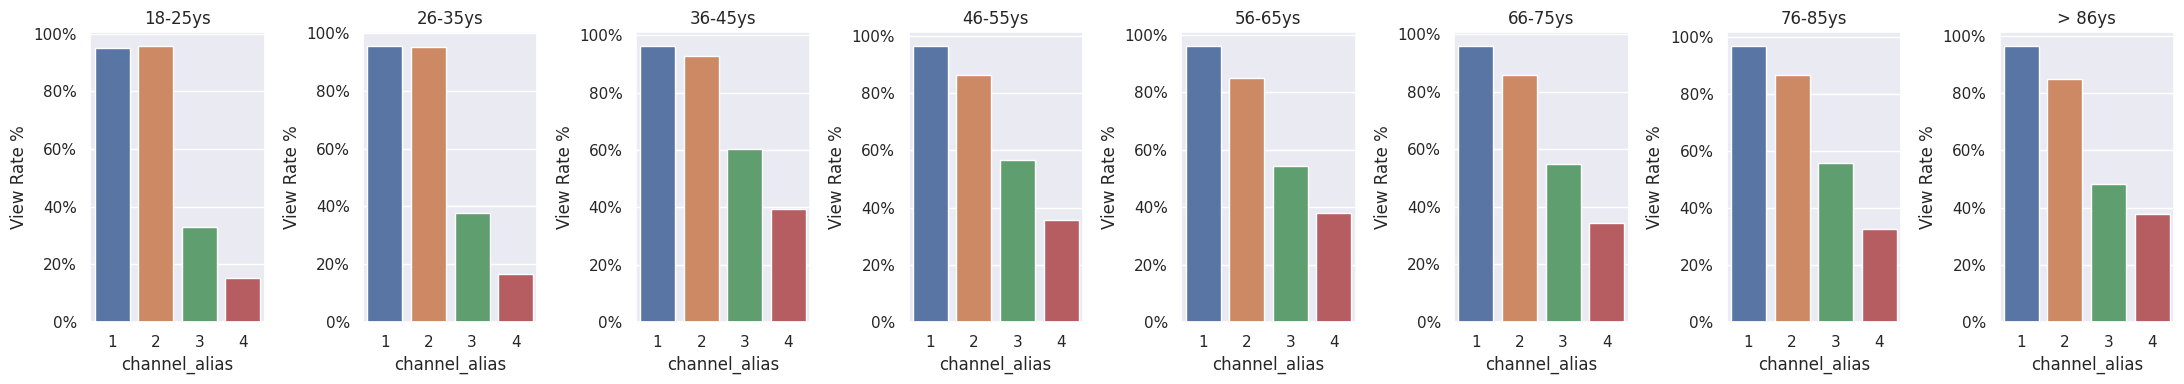

In [ ]:
# Group data
grouped_by_age = event_offer_customer.groupby(['age_group', 'event','channel_alias']).agg({'hours_since_start': 'count'})

# Visualize
age_group_list = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, len(age_group_list), figsize = (22,4))
for i in range(len(age_group_list)):
    p = (grouped_by_age.loc[(age_group_list[i], 'offer viewed')] / grouped_by_age.loc[(age_group_list[i], 'offer received')]).sort_index()
    p.rename(columns = {'hours_since_start': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p, x = 'channel_alias', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(age_group_list[i])
    axs[i].set_ylabel('View Rate %')

plt.tight_layout()
plt.show()


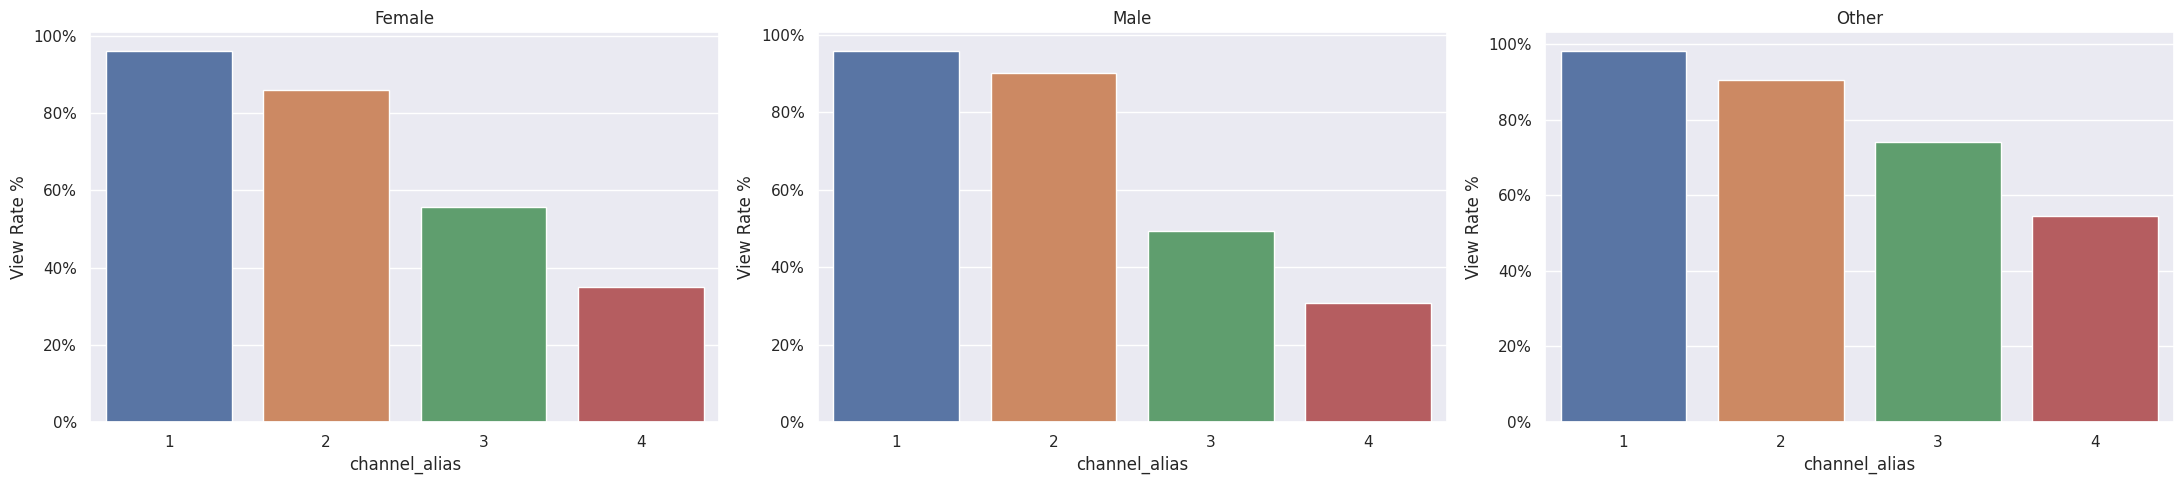

In [ ]:
# Group data
grouped_by_gender = event_offer_customer.groupby(['gender', 'event','channel_alias']).agg({'hours_since_start': 'count'})

# Visualize
gender_list = ['F', 'M', 'O']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]
title_list = ['Female', 'Male', 'Other']

fig, axs = plt.subplots(1, len(gender_list), figsize = (22,5))
for i in range(len(gender_list)):
    p = (grouped_by_gender.loc[(gender_list[i], 'offer viewed')] / grouped_by_gender.loc[(gender_list[i], 'offer received')]).sort_index()
    p.rename(columns = {'hours_since_start': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p, x = 'channel_alias', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(title_list[i])
    axs[i].set_ylabel('View Rate %')

plt.tight_layout()
plt.show()

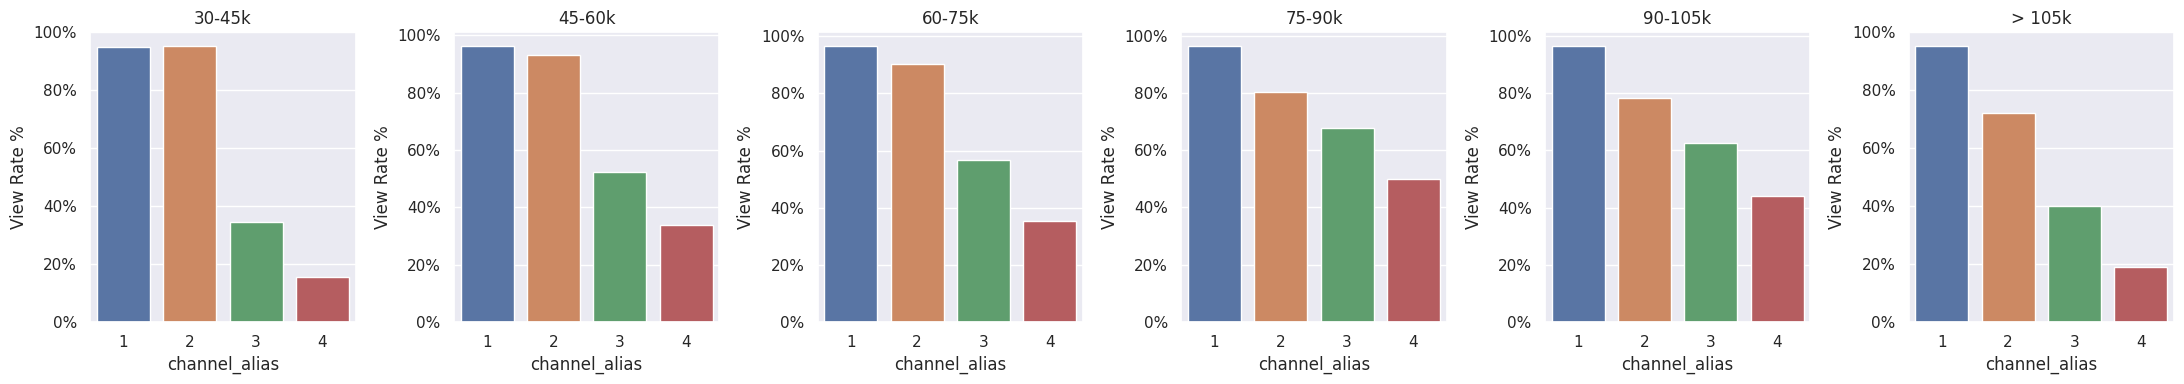

In [ ]:
# Group data
grouped_by_income = event_offer_customer.groupby(['income_group', 'event','channel_alias']).agg({'hours_since_start': 'count'})

# Visualize
income_group_list = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, len(income_group_list), figsize = (22,4))
for i in range(len(income_group_list)):
    p = (grouped_by_income.loc[(income_group_list[i], 'offer viewed')] / grouped_by_income.loc[(income_group_list[i], 'offer received')]).sort_index()
    p.rename(columns = {'hours_since_start': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p, x = 'channel_alias', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(income_group_list[i])
    axs[i].set_ylabel('View Rate %')

plt.tight_layout()
plt.show()

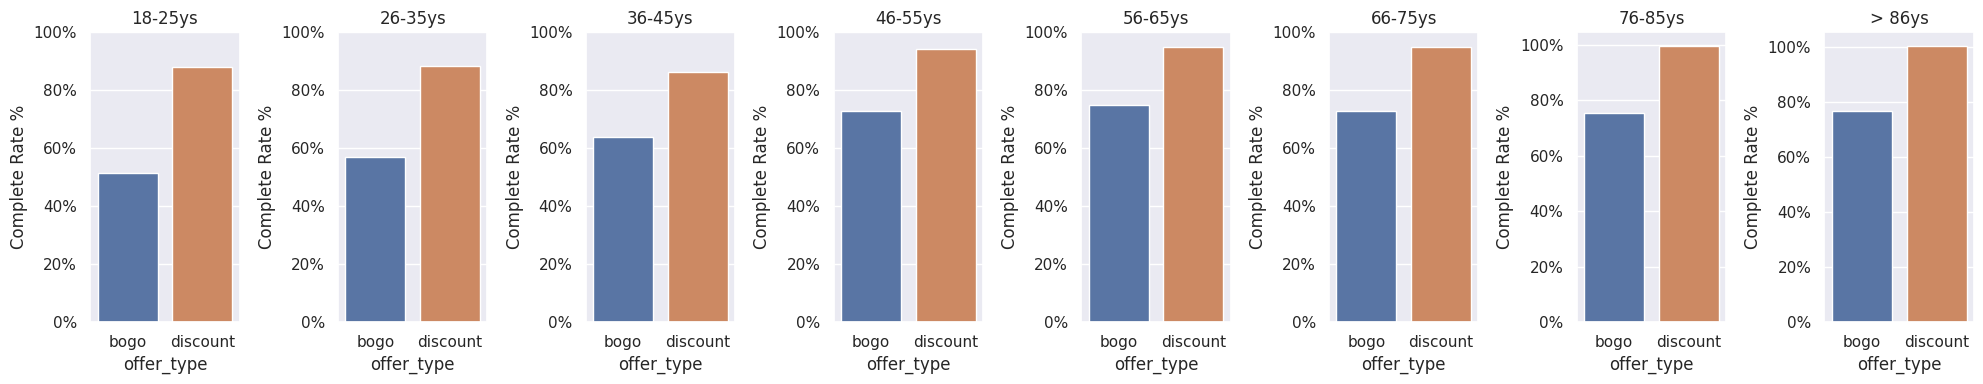

In [ ]:
# Group data
grouped_by_age = event_offer_customer.groupby(['age_group', 'event','offer_type']).agg({'hours_since_start': 'count'})

# Visualize
age_group_list = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, len(age_group_list), figsize = (20,4))
for i in range(len(age_group_list)):
    p = (grouped_by_age.loc[(age_group_list[i], 'offer completed')] / grouped_by_age.loc[(age_group_list[i], 'offer viewed')]).sort_index()
    p.rename(columns = {'hours_since_start': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p.iloc[0:2,:], x = 'offer_type', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(age_group_list[i])
    axs[i].set_ylabel('Complete Rate %')

plt.tight_layout()
plt.show()

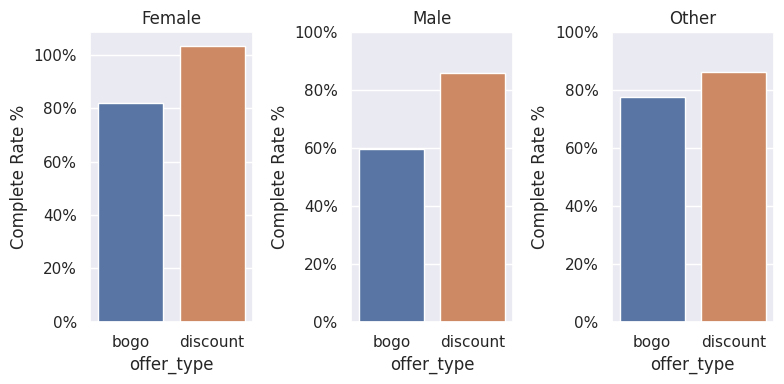

In [ ]:
# Group data
grouped_by_gender = event_offer_customer.groupby(['gender', 'event','offer_type']).agg({'hours_since_start': 'count'})

# Visualize
gender_list = ['F', 'M', 'O']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]
title_list = ['Female', 'Male', 'Other']

fig, axs = plt.subplots(1, len(gender_list), figsize = (8,4))
for i in range(len(gender_list)):
    p = (grouped_by_gender.loc[(gender_list[i], 'offer completed')] / grouped_by_gender.loc[(gender_list[i], 'offer viewed')]).sort_index()
    p.rename(columns = {'hours_since_start': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p.iloc[0:2,:], x = 'offer_type', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(title_list[i])
    axs[i].set_ylabel('Complete Rate %')

plt.tight_layout()
plt.show()

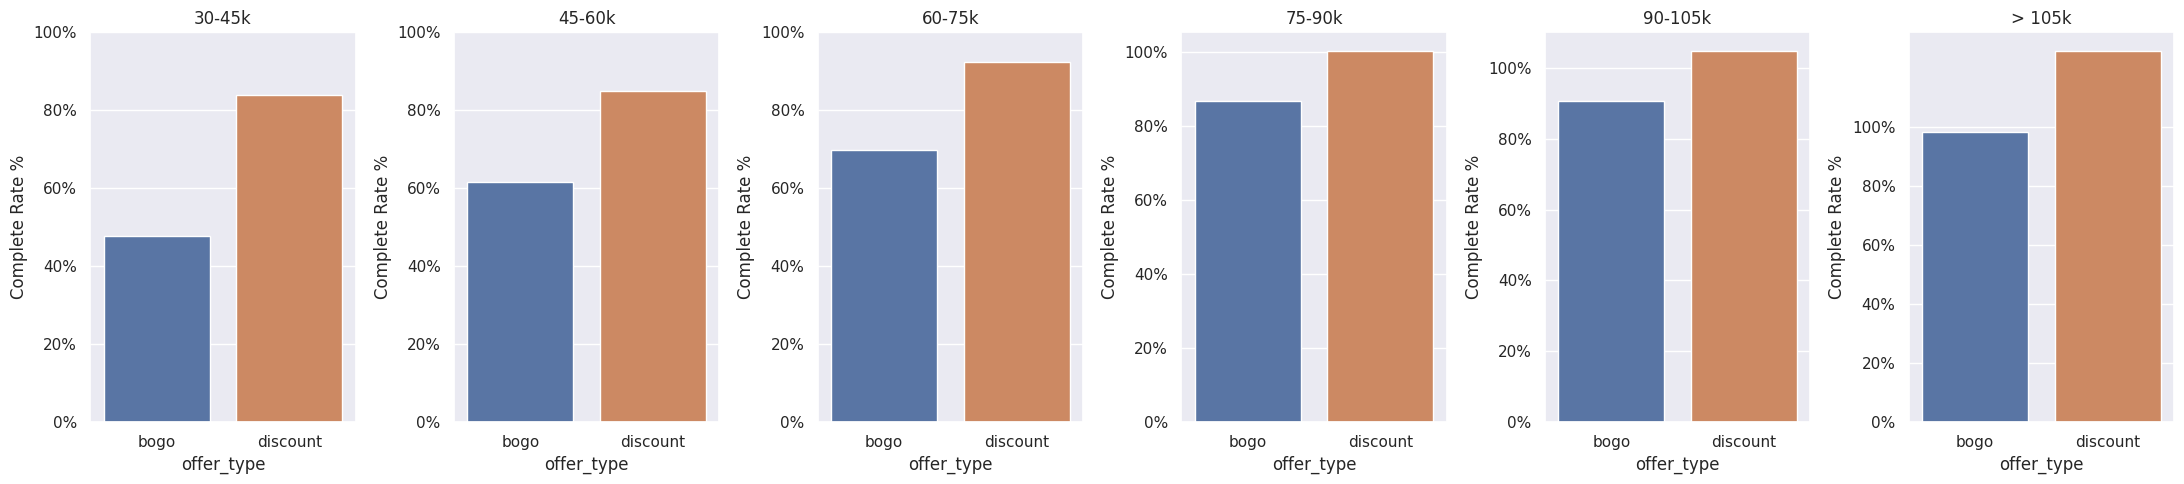

In [ ]:
# Group data
grouped_by_income = event_offer_customer.groupby(['income_group', 'event','offer_type']).agg({'hours_since_start': 'count'})

# Visualize
income_group_list = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, len(income_group_list), figsize = (22,5))
for i in range(len(income_group_list)):
    p = (grouped_by_income.loc[(income_group_list[i], 'offer completed')] / grouped_by_income.loc[(income_group_list[i], 'offer viewed')]).sort_index()
    p.rename(columns = {'hours_since_start': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p.iloc[0:2,:], x = 'offer_type', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(income_group_list[i])
    axs[i].set_ylabel('Complete Rate %')

plt.tight_layout()
plt.show()